In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Importar todas las librerias
import matplotlib
matplotlib.use('module://matplotlib_inline.backend_inline')
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)

## Visualización de los datos
Aquí se visualizará los 3 archivos obtenidos.

In [4]:
%pip install ydata-profiling


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from ydata_profiling import ProfileReport

Se define la ruta de archivo

In [6]:
RUTA_ARCHIVOS = "data/"

In [7]:
diccionario_datos = pd.read_excel(RUTA_ARCHIVOS+"DiccPacientes.xlsx")
diccionario_datos

,Nombre Columna,Tipo de dato,Comentarios
0,Patient ID,String,Identificador del paciente
1,Date of Service,Date,Fecha de la atención
2,Sex,String,"Sexo (Femenino, Masculino)"
3,Age,Integer,Edad
4,Weight (kg),Float,Peso
5,Height (m),Float,Altura
6,BMI,Float,Índice de masa corporal
7,Abdominal Circumference (cm),Float,Circunferencia abdominal
8,Blood Pressure (mmHg),String,"Presión sanguínea, de la forma ""<Presión arter..."
9,Total Cholesterol (mg/dL),Float,Colesterol total


In [8]:
datos_lab_1 = pd.read_csv(RUTA_ARCHIVOS+"Datos Lab 1.csv").copy()
datos_lab_1

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,"November 08, 2023",M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,77.0,91.0,Y,Y,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,20/03/2024,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,71.0,76.0,N,Y,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
2,WjVn1699,2021-05-27,F,NaN,73.400,1.650,27.000,78.100,90/74,135.0,60.0,150.0,N,N,High,N,165.000,0.473,90.0,74.0,Normal,45.0,12.600,LOW
3,dCDO1109,"April 18, 2022",F,35.0,113.300,1.780,35.800,79.600,92/89,158.0,34.0,111.0,Y,N,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,01/11/2024,F,48.0,102.200,1.750,33.400,106.700,121/68,207.0,49.0,147.0,Y,Y,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,mrzf5858,"May 21, 2021",F,35.0,77.600,1.780,24.500,84.600,124/90,143.0,76.0,108.0,N,N,Low,N,178.000,0.475,124.0,90.0,Hypertension Stage 2,37.0,13.960,LOW
1635,nPnN5477,12/04/2022,F,35.0,92.005,1.726,NaN,98.692,95/111,156.0,80.0,80.0,N,Y,High,N,172.602,0.572,95.0,111.0,Hypertension Stage 2,46.0,14.316,LOW
1636,ePpS4710,12/04/2022,M,48.0,50.100,1.770,16.000,104.100,146/95,210.0,70.0,108.0,N,N,Low,Y,177.000,0.588,146.0,NaN,Hypertension Stage 2,110.0,NaN,HIGH
1637,QSFT6794,"September 06, 2025",M,49.0,NaN,1.630,23.100,93.800,144/91,191.0,79.0,117.0,Y,Y,Moderate,Y,163.000,0.575,144.0,NaN,Hypertension Stage 2,82.0,17.640,HIGH


In [9]:
# reporte = ProfileReport(datos_lab_1, title="Datos lab 1")

# reporte.to_notebook_iframe()
# reporte.to_file("EDA_Lab_1.html")

In [10]:
def revisar_columnas(serie_revisar: pd.Series):
  print("---" + serie_revisar.name + "---")
  print(serie_revisar.unique())
  if (serie_revisar.isna().any()):
    print("Cantidad de NaN: "+ str(serie_revisar.isna().sum()))
    print("Porcentaje frente a datos totales: "+ str((serie_revisar.isna().sum()/len(serie_revisar))*100))
  if (serie_revisar.isnull().any()):
    print("Cantidad de nulos: "+ str(serie_revisar.isnull().sum()))
    print("Porcentaje frente a datos totales: "+ str((serie_revisar.isna().sum()/len(serie_revisar)*100)))
  print("Contiene duplicados: "+ str(serie_revisar.duplicated().any()))
  print("Número de datos duplicados" + str(serie_revisar.duplicated().sum()))
  print("Value counts ordenado "+ str(serie_revisar.value_counts(dropna=False, sort=True)))
  print("Cantidad de repetidos"+ str(len(serie_revisar.value_counts(dropna=False, sort=True)[serie_revisar.value_counts(dropna=False, sort=True) > 1])))
  print("-------------")

In [11]:
def revisar_columnas_numericas(serie_revisar: pd.DataFrame):
  revisar_columnas(serie_revisar)
  print(serie_revisar.describe)
  print("-------------")

def revisar_columnas_categoricas(serie_revisar: pd.DataFrame):
  revisar_columnas(serie_revisar)
  print("-------------")
  
def revisar_filas_duplicadas(df_revisar: pd.DataFrame):
  return df_revisar[df_revisar.duplicated(keep=False)]

In [12]:
# Revisión de las columnas
for columna in datos_lab_1.columns:
  if (pd.api.types.is_integer_dtype(datos_lab_1[columna]) or datos_lab_1[columna].dtype == "float64"):
    revisar_columnas_numericas(datos_lab_1[columna])
  else:
    revisar_columnas_categoricas(datos_lab_1[columna])

---Patient ID---
['isDx5313' 'LHCK2961' 'WjVn1699' ... 'nPnN5477' 'QSFT6794' 'pDkH8432']
Contiene duplicados: True
Número de datos duplicados263
Value counts ordenado Patient ID
AhYt1346    3
RlsB8509    3
RwGu5647    3
dJuC5084    3
YLCe2926    3
           ..
Srzz2840    1
nMHG7307    1
VpjT3887    1
CNBz8190    1
qgQI1151    1
Name: count, Length: 1376, dtype: int64
Cantidad de repetidos171
-------------
-------------
---Date of Service---
['November 08, 2023' '20/03/2024' '2021-05-27' ... 'May 21, 2021'
 'September 06, 2025' '2021-05-01']
Contiene duplicados: True
Número de datos duplicados365
Value counts ordenado Date of Service
09-20-2023           6
December 05, 2025    5
December 02, 2020    4
01/12/2024           4
08-09-2022           4
                    ..
2025-02-16           1
April 14, 2021       1
07/09/2021           1
12-13-2024           1
22/10/2021           1
Name: count, Length: 1274, dtype: int64
Cantidad de repetidos238
-------------
-------------
---Sex---
[

In [13]:
waist_to_height_rario_calculado_cm = (datos_lab_1["Abdominal Circumference (cm)"] / datos_lab_1["Height (cm)"]).round(3)
waist_to_height_rario_calculado_m = ((datos_lab_1["Abdominal Circumference (cm)"] / 100) / (datos_lab_1["Height (cm)"] / 100)).round(3)
dataframe_comparar = pd.DataFrame({"Patient ID": datos_lab_1["Patient ID"], "Waist to Height Ratio Calculado cm": waist_to_height_rario_calculado_cm, "Waist to Height Ratio Reportado": datos_lab_1["Waist-to-Height Ratio"], "Waist to Height Ratio Calculado m": waist_to_height_rario_calculado_m})
dataframe_comparar[(dataframe_comparar["Waist to Height Ratio Calculado cm"] != dataframe_comparar["Waist to Height Ratio Reportado"])
                   & (dataframe_comparar["Waist to Height Ratio Calculado m"].notna()) & (dataframe_comparar["Waist to Height Ratio Reportado"].notna())]

,Patient ID,Waist to Height Ratio Calculado cm,Waist to Height Ratio Reportado,Waist to Height Ratio Calculado m
22,oJnb5472,0.696,0.587,0.696
31,RwGu5647,0.475,0.259,0.475
60,KDxT0271,0.607,0.783,0.607
130,BQvQ6431,0.342,0.427,0.342
209,bXGf5217,0.811,0.495,0.811
269,ZEEd3660,0.274,0.507,0.274
271,FIdx2817,0.802,0.433,0.802
314,BmCj6303,0.274,0.376,0.274
333,KQUs0708,0.412,0.260,0.412
335,WVHY1179,0.735,0.401,0.735


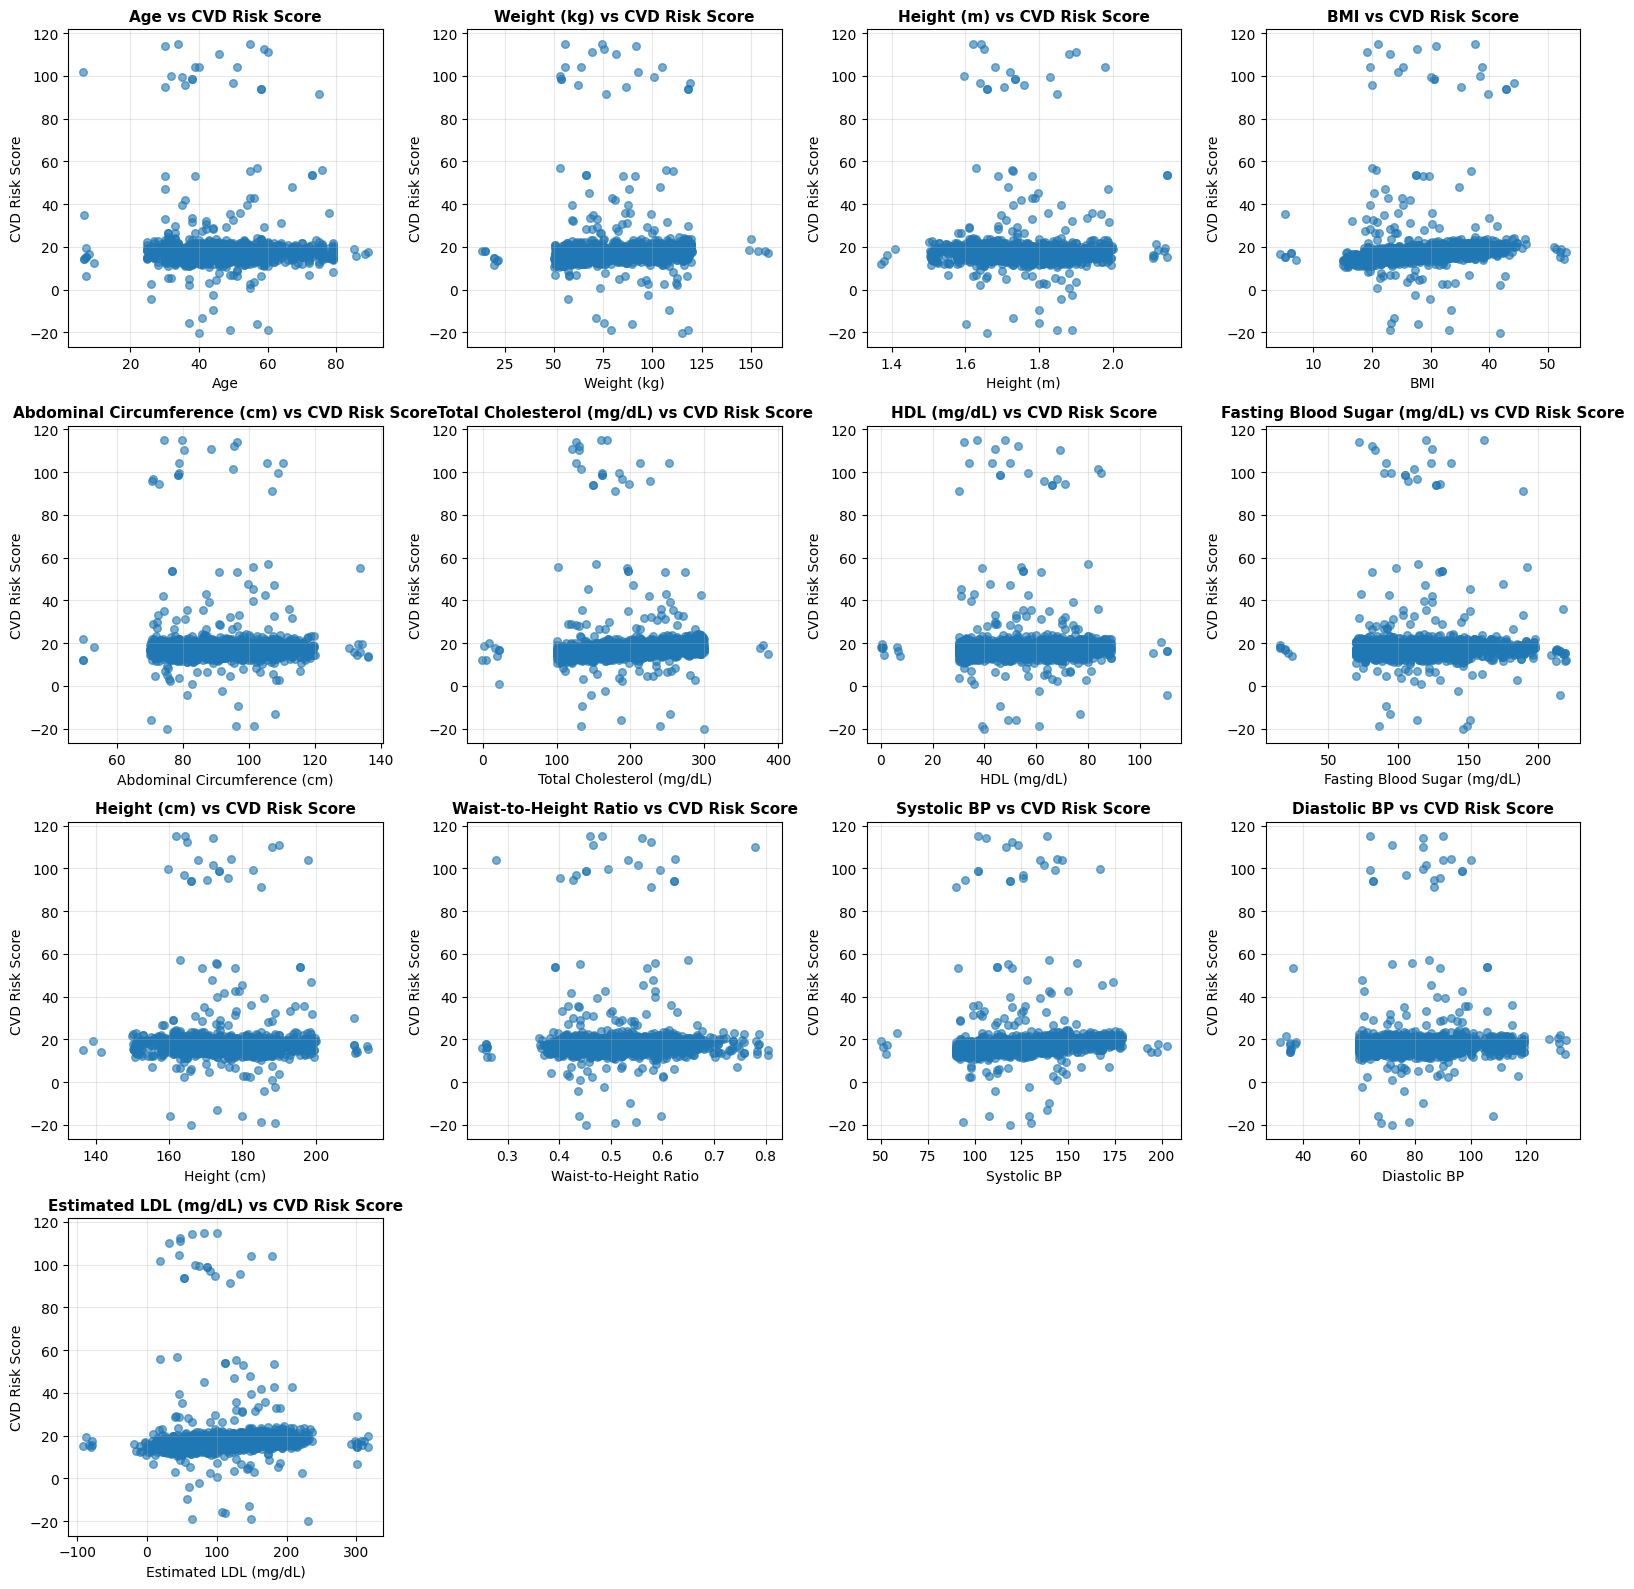

In [ ]:
# Obtener solo columnas numéricas
numeric_cols = datos_lab_1.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remover CVD Risk Score de la lista para no plotear contra sí mismo
if 'CVD Risk Score' in numeric_cols:
    numeric_cols.remove('CVD Risk Score')

# Crear figura con subplots
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()

# Crear scatter plot para cada variable numérica
for i, col in enumerate(numeric_cols):
    axes[i].scatter(datos_lab_1[col], datos_lab_1['CVD Risk Score'], alpha=0.6, s=30)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('CVD Risk Score', fontsize=10)
    axes[i].set_title(f'{col} vs CVD Risk Score', fontsize=11, fontweight='bold')
    axes[i].grid(True, alpha=0.3)

# Ocultar subplots vacíos
for i in range(len(numeric_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.savefig("correlaciones_cvd_risk_score.png", dpi=300)
plt.show()


### Resultados obtenidos de la exploración manual y Pandas Profiling
Durante la exploración manual y por medio de la herramienta de Pandas Profiling, se encontraron las siguientes observaciones:
#### Pacient ID
Existen valores que se encuentran repetidos más de una vez, indicando posibles repeticiones en mediciones o errores a la hora de ingresar pacientes al dataset.
Igualmente, no se encontraron valores nulos en esta variable.

---

#### Date of Service
Se encuentra en distintos formatos, sin embargo, no contiene celdas nulas.
Dado a que no se usará en el modelo, no se realizará ningún tipo de limpieza o transformación sobre esta variable.
##### Estrategia de limpieza e imputación
No se realizará ninguna limpieza o imputación, dado que no se encontró ningún valor nulo en esta variable, y además no se usará en el modelo de regresión.

---

#### Sex
Se encuentra en el formato \[M,F] y no contiene valores nulos, por lo que no se debe limpiar.
##### Transformación a realizar
Se hará una transformación a one-hot encoding para convertirlo a formato numérico, dado que se usará en el modelo de regresión.
##### Estrategia de limpieza e imputación
No se realizará ninguna limpieza o imputación, dado que no se encontraron valores nulos o inconsistentes en esta variable.

---

#### Age
Contiene dos problemas principales
1. Existen datos que se dan en formato decimal, tales como 6.134, los cuales se consideran incorrectos de acuerdo al diccionario de datos.
2. Existen alrededor de 68 datos nulos, indicando alrededor de 4.1% de los registros totales.
##### Estrategia de limpieza e imputación
- Realizar redondeo de los valores decimales a enteros, ya que no se espera tener edades fraccionarias.
- Realizar la imputación de los valores nulos utilizando la mediana de edad.
- Se eliminarán los registros con edades menores a 18 años, dado que el dataset se enfoca en adultos y estas edades no son relevantes para el análisis de riesgo cardiovascular.

---

#### Weight
Se observa que existen 73 valores nulos, correspondiendo a alrededor del 4.5% del dataset completo. Igualmente, contiene registros que se pueden considerar outliers, tales como 13.261kg y 158.523kg.
##### Transformación a realizar
- No se realizará ninguna transformación sobre los datos, dado que el peso se encuentra en kg, lo cual es una unidad común y fácil de interpretar.
##### Estrategia de limpieza e imputación
- Utilizar la formula de $BMI = \frac{Height}{Weight^2}$ con el fin de obtener alguno de los dos valores faltantes.
- Si no es posible, puesto que dos de 3 de los necesarios faltan, se hará la eliminación del registro, dado que el peso es una variable fundamental para el modelo de regresión y no se puede imputar con certeza sin tener al menos una de las otras dos variables (Height o BMI).
----

#### Height (m)
Contiene alrededor de 61 valores nulos, que corresponden a alrededor de 3.7% del dataset. Se encuentran minimos de 1.371m y máximos de 2.146m, los cuales son valores clínicamente posibles, aunque el mínimo es un poco bajo para adultos.
##### Transformación a realizar
- Realizar la conversión de metros a centímetros, dado que es una unidad más común para la altura y facilitará la interpretación de los resultados.
##### Estrategia de limpieza e imputación
- Utilizar la formula de $BMI = \frac{Height}{Weight^2}$ con el fin de obtener alguno de los dos valores faltantes.
- Si se encuentra disponible el dato de Height (cm) para esa misma fila, se hará la conversión necesaria para reemplazar la altura en metros.
- Si no es posible, puesto que dos de 3 de los necesarios faltan, se hará la eliminación del registro, dado que la altura es una variable fundamental para el modelo de regresión y no se puede imputar con certeza sin tener al menos una de las otras dos variables (Weight o BMI).

---

#### BMI
Contiene alrededor de 53 celdas con valor nulo, correspondiendo al 3.2% del dataset.
##### Transformación a realizar
- No se realizará ninguna transformación sobre los datos, dado que el BMI es una variable comúnmente utilizada y fácil de interpretar en su forma actual.
##### Estrategia de limpieza e imputación
- Utilizar la formula de $BMI = \frac{Height}{Weight^2}$ con el fin de obtener alguno de los dos valores faltantes.
- Si no es posible, puesto que dos de 3 de los necesarios faltan, se hará la eliminación del registro, dado que el BMI es una variable fundamental para el modelo de regresión y no se puede imputar con certeza sin tener al menos una de las otras dos variables (Height o Weight).
- Se eliminarán los registros con valores de BMI que sean clínicamente imposibles o extremadamente improbables (por ejemplo, BMI < 8 o BMI > 60), dado que estos valores no son realistas para adultos y podrían distorsionar el análisis.

---

#### Abdominal Circumference
Contiene alrededor de 61 celdas con valor nulo, correspondiendo al 3.7% del dataset. 
##### Estrategia de limpieza e imputación
- Usar el waist-to-height ratio para encontrar el valor faltante, con la circunferencia y altura de la persona.
- Si no es posible, se hará la eliminación del registro, dado que la circunferencia abdominal es una variable importante para el modelo de regresión y no se puede imputar con certeza sin tener al menos una de las otras dos variables (Height o Waist-to-Height Ratio).

---

#### Blood Pressure y Systolic/Diastolic BP
No contiene valores nulos, pero tiene un formato de string que combina la presión sistólica y diastólica (por ejemplo, "120/80 mmHg"). Esto dificulta su uso directo en el modelo de regresión.
Las variables de Systolic BP y Diastolic BP tienen valores nulos, con 61 y 85 respectivamente, donde algunos de estos valores son flotantes, lo cual no es clínicamente razonable para la presión arterial.
##### Estrategia de limpieza e imputación
- Realizar la separación de la presión sistólica y diastólica en dos variables numéricas distintas (Systolic BP y Diastolic BP) para facilitar su uso en el modelo de regresión.
- No tener en cuenta el string de Blood Pressure para el modelo, dado que se pueden obtener las variables numéricas de Systolic y Diastolic BP.
- Ignorar las variables originales de Blood Pressure para el modelo, puesto que tienen más inconsistencias y no aportan información adicional una vez que se han separado las variables numéricas de Systolic y Diastolic BP.

---

#### Total Cholesterol
- Tiene 68 datos faltantes y datos imposibles de alcanzar clinicamente, tal como -1.256 mg/dL, mostrandose fisicamente imposible.
##### Estrategia a utilizar
- Eliminar datos que son fisicamente imposibles (menores a 0)
- Imputar aquellos faltantes a partir de una regresión lineal utilizando el Estimated LDL, gracias a una alta correlación entre ambas variables.

---

#### HDL
Tiene 82 valores nulos (aprox 5% del dataset). 
Dentro de este aparecen valores muy bajos como 0.008 mg/dL, lo cual no es clínicamente creíble.

##### Estrategia a utilizar
- Eliminar valores fisiológicamente imposibles o extremadamente improbables (HDL ≤ 0).
- Imputar valores faltantes usando la mediana, dado a que no existe una correlación fuerte con los demás valores para poder imputar.

---

#### Fasting Blood Sugar
Contiene 54 valores nulos (≈3.3%). El mínimo observado es 15.306 mg/dL, valor incompatible con la vida y claramente un error de medición o digitación.

##### Estrategia a utilizar
- Eliminar valores fisiológicamente imposibles (por ejemplo < 40 mg/dL).
- Imputar valores faltantes usando la mediana, preferiblemente estratificada por Diabetes Status para no destruir la señal clínica.

---

#### Smoking Status
No tiene valores nulos y está bien codificado como booleano. Distribución razonable.

##### Estrategia a utilizar
- Codificar de forma numérico para su ingreso al modelo.
---

#### Diabetes Status
No tiene valores nulos. La distribución es cercana a 50/50, lo cual no es realista para población general.

##### Estrategia a utilizar
- No modificar la variable.
- Documentar posible sesgo de muestreo o que el dataset no representa población general.

---

#### Physical Activity Level
No presenta valores nulos y contiene tres categorías claras (Low, Moderate, High) y distribución balanceada.

##### Estrategia a utilizar
- No requiere imputación.
- Codificar de forma ordinal para su ingreso al modelo.

---

#### Family History of CVD
No presenta valores nulos. Otra variable con distribución casi perfectamente balanceada, lo cual es raro.

##### Estrategia a utilizar
- Mantener la variable.
- Codificar de forma numérica para su ingreso al modelo.
---

#### Height (cm)
Tiene 68 valores nulos (4.1%) y alta correlación con Height (m), lo que indica redundancia.

##### Estrategia a utilizar
- Si Height (m) está disponible, convertir directamente a cm.
- Si no, usar Weight y BMI para estimar la altura.
- Si falta más de una variable necesaria, imputar con la mediana estratificada por sexo.

---

#### Waist-to-Height Ratio
Presenta 76 valores nulos (4.6%) y está fuertemente correlacionado con Abdominal Circumference y Height.

##### Estrategia a utilizar
- Calcular el ratio cuando cintura y altura estén disponibles.
- Si no es posible, imputar con la mediana estratificada por sexo.

---

#### Blood Pressure Category
Dado a que se pueden obtener las variables numéricas de Systolic y Diastolic BP, esta variable se vuelve redundante y no aporta información adicional.

---

#### Estimated LDL
Tiene 57 valores nulos (3.5%) y valores negativos, lo cual no tiene ningún sentido físico.

##### Estrategia a utilizar
- Eliminar valores negativos.
- Recalcular LDL usando fórmulas estándar cuando sea posible.
- Imputar valores faltantes con Total Cholesterol y HDL.

---

#### CVD Risk Score
Presenta 29 valores nulos (1.8%) y valores negativos, lo cual no es interpretable.

##### Estrategia a utilizar
- Eliminar valores negativos.
- Elimnar los registros con valores nulos, dado que es la variable objetivo y no se puede imputar con certeza sin tener el valor real.
---

#### CVD Risk Level
No tiene valores nulos y contiene tres categorías, sin embargo, la asignación de niveles no es consistente con los valores de CVD Risk Score, lo cual indica posibles errores en la categorización.

## Fenómenos de interés
- Valores nulos en variables clave como Age, Weight, Height, Blood Pressure, Total Cholesterol, HDL, Fasting Blood Sugar, Estimated LDL y CVD Risk Score.
- Valores imposibles o extremadamente improbables en varias variables, indicando errores de medición o digitación.
- Variables redundantes como Height (m) y Height (cm), así como Blood Pressure en formato string vs Systolic/Diastolic BP.
- Distribuciones sospechosamente balanceadas en variables como Diabetes Status y Family History of CVD, lo cual podría indicar sesgo de muestreo.
- Registros duplicados con el mismo Patient ID, con múltiples registros para el mismo paciente con label diferente lo cual es un error de digitación o de manejo de datos.
- A partir de la gráfica de correlaciones con la variable CVD Risk Score, se evidencia que muchos datos se encuentran agrupados en un conjunto importante y no representan la población general, lo cual podría indicar un sesgo de muestreo o una limitación del dataset.

## Limpieza de los datos
De acuerdo con el análisis previo, se procederá a realizar la limpieza de los datos siguiendo las estrategias planteadas para cada variable. 
Más especificamente, se realizarán las siguientes acciones:
### Eliminaciones
1. Eliminar registros con edades menores a 18 años.
2. Eliminar registros con valores de BMI menores a 8 o mayores a 60.
3. Eliminar registros con valores de HDL menores o iguales a 0.
4. Eliminar registros con valores de Fasting Blood Sugar menores a 0 mg/dL.
5. Eliminar registros con valores de Estimated LDL menores a 0.
6. Eliminar registros con valores de CVD Risk Score menores a 0.
### Imputaciones
1. Imputar valores faltantes de Age utilizando la mediana de edad.
2. Imputar valores faltantes de Weight utilizando la formula de BMI y Height, o eliminando el registro si no es posible.
3. Imputar valores faltantes de Height utilizando la formula de BMI y Weight, o convirtiendo desde Height (cm) si está disponible, o eliminando el registro si no es posible.
4. Imputar valores faltantes de BMI utilizando la formula de Weight y Height, o eliminando el registro si no es posible.
5. Imputar valores faltantes de Abdominal Circumference utilizando el waist-to-height ratio y la altura, o eliminando el registro si no es posible.
6. Imputar valores faltantes de Systolic BP y Diastolic BP separando el string de Blood Pressure.
7. Imputar valores faltantes de Total Cholesterol utilizando una regresión lineal con Estimated LDL.
8. Imputar valores faltantes de HDL utilizando la mediana.
9. Imputar valores faltantes de Fasting Blood Sugar utilizando la mediana estratificada por Diabetes Status.
10. Imputar valores faltantes de Height (cm) utilizando Height (m) o la formula de BMI y Weight.
11. Imputar valores faltantes de Waist-to-Height Ratio utilizando Abdominal Circumference y Height o eliminando el registro si no es posible.
12. Imputar valores faltantes de Estimated LDL utilizando Total Cholesterol en una regresión lineal.
13. Eliminar los registros con valores nulos en CVD Risk Score, dado que es la variable objetivo y no se puede imputar con certeza sin tener al menos una de las otras variables base para el cálculo del score.

### Transformaciones
1. Convertir la variable de Sex a formato numérico utilizando one-hot encoding. (M = 0, F = 1)
2. Convertir la variable de Height de metros a centímetros.
3. Separar la variable de Blood Pressure en dos variables numéricas distintas: Systolic BP y Diastolic BP.
4. Codificar la variable de Physical Activity Level de forma ordinal (Low = 0, Moderate = 1, High = 2).
5. Codificar la variable de Smoking Status como booleano (No = 0, Yes = 1).
6. Codificar la variable de Diabetes Status como booleano (No = 0, Yes = 1).
7. Codificar la variable de Family History of CVD como booleano (No = 0, Yes = 1).
8. Codificar la variable de Blood Pressure Category en categorías numéricas (Normal = 0, Elevated = 1, Hypertension Stage 1 = 2, Hypertension Stage 2 = 3). (Potencialmente eliminable porque ya se tienen las variables numéricas de Systolic y Diastolic BP)

### Limpieza de datos
Para empezar, hacemos la eliminación de las filas de datos que presentan datos incoherentes.

El riesgo cardiovascular no debe ser intuido por medio de otros datos. Asi que se eliminan los registros que no tienen CVD Risk Score.

In [15]:
datos_limpieza = datos_lab_1.copy()

In [16]:
mask_1 = (datos_lab_1["CVD Risk Score"] < 0) | (datos_lab_1["CVD Risk Score"].isna()) | (datos_lab_1["Age"] < 18) | (datos_lab_1["BMI"] < 8) | (datos_lab_1["BMI"] > 60) | (datos_lab_1["HDL (mg/dL)"] <= 0) | (datos_lab_1["Fasting Blood Sugar (mg/dL)"] <= 40)
datos_lab_1[mask_1][["Patient ID", "CVD Risk Score", "Age", "BMI", "HDL (mg/dL)", "Fasting Blood Sugar (mg/dL)"]]

,Patient ID,CVD Risk Score,Age,BMI,HDL (mg/dL),Fasting Blood Sugar (mg/dL)
8,bUBT9994,NaN,89.162,31.100,66.000,99.000
45,DhUJ7239,14.352,6.420,22.060,65.000,151.000
55,RKHI8124,NaN,49.000,24.400,78.000,92.000
140,QJtE0701,15.168,49.000,5.184,55.000,120.000
154,LpyK7269,-4.166,26.000,29.971,110.315,215.614
...,...,...,...,...,...,...
1535,ErrJ8589,NaN,42.000,17.800,46.000,71.000
1546,dHEX0475,13.826,42.000,7.105,45.000,120.000
1553,qXdE2915,19.530,7.025,37.100,64.000,131.000
1563,ssXG1731,NaN,29.000,39.011,34.000,178.000


Eliminar filas con anotaciones faltantes en el CVD Risk Score, puesto que es incorrecto imputarlas.

In [17]:
# TARGET = "CVD Risk Score"
# mean = datos_limpieza[TARGET].mean()
# std = datos_limpieza[TARGET].std()
# outliers_mask = (datos_limpieza[TARGET] >= mean - 5*std) & (datos_limpieza[TARGET] <= mean + 5*std)
# datos_limpieza = datos_limpieza[outliers_mask].copy()
# datos_limpieza

In [18]:
datos_limpieza = datos_limpieza.dropna(subset=["CVD Risk Score"]).copy()
datos_limpieza

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,"November 08, 2023",M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,77.0,91.0,Y,Y,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,20/03/2024,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,71.0,76.0,N,Y,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
2,WjVn1699,2021-05-27,F,NaN,73.400,1.650,27.000,78.100,90/74,135.0,60.0,150.0,N,N,High,N,165.000,0.473,90.0,74.0,Normal,45.0,12.600,LOW
3,dCDO1109,"April 18, 2022",F,35.0,113.300,1.780,35.800,79.600,92/89,158.0,34.0,111.0,Y,N,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,01/11/2024,F,48.0,102.200,1.750,33.400,106.700,121/68,207.0,49.0,147.0,Y,Y,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,gBFe4249,04/02/2020,F,52.0,89.700,1.880,25.400,107.500,145/92,142.0,NaN,96.0,Y,Y,Low,Y,188.000,0.572,145.0,92.0,Hypertension Stage 2,42.0,17.170,HIGH
1634,mrzf5858,"May 21, 2021",F,35.0,77.600,1.780,24.500,84.600,124/90,143.0,76.0,108.0,N,N,Low,N,178.000,0.475,124.0,90.0,Hypertension Stage 2,37.0,13.960,LOW
1635,nPnN5477,12/04/2022,F,35.0,92.005,1.726,NaN,98.692,95/111,156.0,80.0,80.0,N,Y,High,N,172.602,0.572,95.0,111.0,Hypertension Stage 2,46.0,14.316,LOW
1637,QSFT6794,"September 06, 2025",M,49.0,NaN,1.630,23.100,93.800,144/91,191.0,79.0,117.0,Y,Y,Moderate,Y,163.000,0.575,144.0,NaN,Hypertension Stage 2,82.0,17.640,HIGH


El riesgo cardiovascular se calcula para adultos, por lo que los datos de personas menores de edad no nos interesa. Así eliminamos los registro con el valor de la columna edad ("Age") menor a 18.

In [19]:
#Eliminar la filas con edad menor a 18 años
datos_limpieza = datos_limpieza[datos_limpieza["Age"] >= 18].copy()
datos_limpieza

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,"November 08, 2023",M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,77.0,91.0,Y,Y,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,20/03/2024,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,71.0,76.0,N,Y,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
3,dCDO1109,"April 18, 2022",F,35.0,113.300,1.780,35.800,79.600,92/89,158.0,34.0,111.0,Y,N,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,01/11/2024,F,48.0,102.200,1.750,33.400,106.700,121/68,207.0,49.0,147.0,Y,Y,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH
5,MQyB2747,25 Mar 24,M,43.0,52.700,1.850,15.400,107.700,107/61,105.0,32.0,70.0,Y,N,High,N,185.000,0.582,107.0,61.0,Normal,43.0,10.530,INTERMEDIARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,ioby2183,13/08/2024,M,40.0,120.000,NaN,35.400,100.900,94/68,223.0,62.0,84.0,Y,Y,Moderate,Y,184.000,0.548,94.0,68.0,Normal,131.0,18.240,HIGH
1633,gBFe4249,04/02/2020,F,52.0,89.700,1.880,25.400,107.500,145/92,142.0,NaN,96.0,Y,Y,Low,Y,188.000,0.572,145.0,92.0,Hypertension Stage 2,42.0,17.170,HIGH
1634,mrzf5858,"May 21, 2021",F,35.0,77.600,1.780,24.500,84.600,124/90,143.0,76.0,108.0,N,N,Low,N,178.000,0.475,124.0,90.0,Hypertension Stage 2,37.0,13.960,LOW
1635,nPnN5477,12/04/2022,F,35.0,92.005,1.726,NaN,98.692,95/111,156.0,80.0,80.0,N,Y,High,N,172.602,0.572,95.0,111.0,Hypertension Stage 2,46.0,14.316,LOW


El indice de masa corporal es muy poco probable que sea menor a 8 o mayor a 60, por lo que se tomo la decisión de eliminar los valores dentro de este rango.

In [20]:
#Eliminiar filas con valores de BMI menores a 8 o mayores a 60
datos_limpieza = datos_limpieza[(datos_limpieza["BMI"] >= 8) & (datos_limpieza["BMI"] <= 60)].copy()
datos_limpieza

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,"November 08, 2023",M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,77.0,91.0,Y,Y,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,20/03/2024,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,71.0,76.0,N,Y,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
3,dCDO1109,"April 18, 2022",F,35.0,113.300,1.780,35.800,79.600,92/89,158.0,34.0,111.0,Y,N,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,01/11/2024,F,48.0,102.200,1.750,33.400,106.700,121/68,207.0,49.0,147.0,Y,Y,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH
5,MQyB2747,25 Mar 24,M,43.0,52.700,1.850,15.400,107.700,107/61,105.0,32.0,70.0,Y,N,High,N,185.000,0.582,107.0,61.0,Normal,43.0,10.530,INTERMEDIARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,pWUu2179,09/11/2025,M,45.0,64.420,1.921,28.513,81.261,131/115,219.0,74.0,157.0,N,Y,Low,Y,192.122,0.423,131.0,115.0,Hypertension Stage 1,115.0,18.633,INTERMEDIARY
1632,ioby2183,13/08/2024,M,40.0,120.000,NaN,35.400,100.900,94/68,223.0,62.0,84.0,Y,Y,Moderate,Y,184.000,0.548,94.0,68.0,Normal,131.0,18.240,HIGH
1633,gBFe4249,04/02/2020,F,52.0,89.700,1.880,25.400,107.500,145/92,142.0,NaN,96.0,Y,Y,Low,Y,188.000,0.572,145.0,92.0,Hypertension Stage 2,42.0,17.170,HIGH
1634,mrzf5858,"May 21, 2021",F,35.0,77.600,1.780,24.500,84.600,124/90,143.0,76.0,108.0,N,N,Low,N,178.000,0.475,124.0,90.0,Hypertension Stage 2,37.0,13.960,LOW


La lipoproteína de alta densidad en el torrente sanguíneo no puede ser negativa o cero, asi que se eliminan los registros con valores inconsistentes.

In [21]:
#Eliminar filas con valores de HDL menores o iguales a 0
datos_limpieza = datos_limpieza[datos_limpieza["HDL (mg/dL)"] > 0].copy()
datos_limpieza

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,"November 08, 2023",M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,77.0,91.0,Y,Y,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,20/03/2024,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,71.0,76.0,N,Y,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
3,dCDO1109,"April 18, 2022",F,35.0,113.300,1.780,35.800,79.600,92/89,158.0,34.0,111.0,Y,N,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,01/11/2024,F,48.0,102.200,1.750,33.400,106.700,121/68,207.0,49.0,147.0,Y,Y,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH
5,MQyB2747,25 Mar 24,M,43.0,52.700,1.850,15.400,107.700,107/61,105.0,32.0,70.0,Y,N,High,N,185.000,0.582,107.0,61.0,Normal,43.0,10.530,INTERMEDIARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,EBtC3267,03-31-2025,F,48.0,59.400,1.880,16.800,91.200,102/84,214.0,69.0,77.0,N,N,Low,Y,188.000,0.485,102.0,84.0,Hypertension Stage 1,115.0,12.740,HIGH
1631,pWUu2179,09/11/2025,M,45.0,64.420,1.921,28.513,81.261,131/115,219.0,74.0,157.0,N,Y,Low,Y,192.122,0.423,131.0,115.0,Hypertension Stage 1,115.0,18.633,INTERMEDIARY
1632,ioby2183,13/08/2024,M,40.0,120.000,NaN,35.400,100.900,94/68,223.0,62.0,84.0,Y,Y,Moderate,Y,184.000,0.548,94.0,68.0,Normal,131.0,18.240,HIGH
1634,mrzf5858,"May 21, 2021",F,35.0,77.600,1.780,24.500,84.600,124/90,143.0,76.0,108.0,N,N,Low,N,178.000,0.475,124.0,90.0,Hypertension Stage 2,37.0,13.960,LOW


Los niveles de azucar en la sangre en ayuno que tienen valores menores o iguales a 0 son imposibles, por lo que se les puede eliminar.

In [22]:
#Eliminar filas con valores de Fasting Blood Sugar menores o iguales a 0
datos_limpieza = datos_limpieza[datos_limpieza["Fasting Blood Sugar (mg/dL)"] > 0].copy()
datos_limpieza

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,"November 08, 2023",M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,77.0,91.0,Y,Y,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,20/03/2024,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,71.0,76.0,N,Y,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
3,dCDO1109,"April 18, 2022",F,35.0,113.300,1.780,35.800,79.600,92/89,158.0,34.0,111.0,Y,N,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,01/11/2024,F,48.0,102.200,1.750,33.400,106.700,121/68,207.0,49.0,147.0,Y,Y,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH
5,MQyB2747,25 Mar 24,M,43.0,52.700,1.850,15.400,107.700,107/61,105.0,32.0,70.0,Y,N,High,N,185.000,0.582,107.0,61.0,Normal,43.0,10.530,INTERMEDIARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,EBtC3267,03-31-2025,F,48.0,59.400,1.880,16.800,91.200,102/84,214.0,69.0,77.0,N,N,Low,Y,188.000,0.485,102.0,84.0,Hypertension Stage 1,115.0,12.740,HIGH
1631,pWUu2179,09/11/2025,M,45.0,64.420,1.921,28.513,81.261,131/115,219.0,74.0,157.0,N,Y,Low,Y,192.122,0.423,131.0,115.0,Hypertension Stage 1,115.0,18.633,INTERMEDIARY
1632,ioby2183,13/08/2024,M,40.0,120.000,NaN,35.400,100.900,94/68,223.0,62.0,84.0,Y,Y,Moderate,Y,184.000,0.548,94.0,68.0,Normal,131.0,18.240,HIGH
1634,mrzf5858,"May 21, 2021",F,35.0,77.600,1.780,24.500,84.600,124/90,143.0,76.0,108.0,N,N,Low,N,178.000,0.475,124.0,90.0,Hypertension Stage 2,37.0,13.960,LOW


La lipoproteína de baja densidad en el torrente sanguíneo debe ser positiva. Asi que eliminamos todos los registro con valores negativos.

In [23]:
#Eliminar filas los valores de Estimated LDL menores a 0
datos_limpieza = datos_limpieza[datos_limpieza["Estimated LDL (mg/dL)"] > 0].copy()
datos_limpieza

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,"November 08, 2023",M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,77.0,91.0,Y,Y,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,20/03/2024,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,71.0,76.0,N,Y,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
3,dCDO1109,"April 18, 2022",F,35.0,113.300,1.780,35.800,79.600,92/89,158.0,34.0,111.0,Y,N,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,01/11/2024,F,48.0,102.200,1.750,33.400,106.700,121/68,207.0,49.0,147.0,Y,Y,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH
5,MQyB2747,25 Mar 24,M,43.0,52.700,1.850,15.400,107.700,107/61,105.0,32.0,70.0,Y,N,High,N,185.000,0.582,107.0,61.0,Normal,43.0,10.530,INTERMEDIARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,EBtC3267,03-31-2025,F,48.0,59.400,1.880,16.800,91.200,102/84,214.0,69.0,77.0,N,N,Low,Y,188.000,0.485,102.0,84.0,Hypertension Stage 1,115.0,12.740,HIGH
1631,pWUu2179,09/11/2025,M,45.0,64.420,1.921,28.513,81.261,131/115,219.0,74.0,157.0,N,Y,Low,Y,192.122,0.423,131.0,115.0,Hypertension Stage 1,115.0,18.633,INTERMEDIARY
1632,ioby2183,13/08/2024,M,40.0,120.000,NaN,35.400,100.900,94/68,223.0,62.0,84.0,Y,Y,Moderate,Y,184.000,0.548,94.0,68.0,Normal,131.0,18.240,HIGH
1634,mrzf5858,"May 21, 2021",F,35.0,77.600,1.780,24.500,84.600,124/90,143.0,76.0,108.0,N,N,Low,N,178.000,0.475,124.0,90.0,Hypertension Stage 2,37.0,13.960,LOW


In [24]:
filas_duplicadas = datos_limpieza[
    datos_limpieza.duplicated(subset=["Patient ID"], keep=False)
]

filas_duplicadas.sort_values(by="Patient ID")


,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
17,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.9,139/61,253.0,77.0,94.0,Y,N,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH
1584,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.9,139/61,253.0,77.0,94.0,Y,N,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH
1227,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.9,139/61,253.0,77.0,94.0,Y,N,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,-13.090,HIGH
1469,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.1,116/93,171.0,44.0,145.0,N,N,Moderate,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,29.833,LOW
1544,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.1,116/93,171.0,44.0,145.0,N,N,Moderate,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,17.500,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,zhZi8857,"December 05, 2025",F,36.0,81.200,1.750,26.500,74.0,141/76,225.0,31.0,124.0,Y,N,Moderate,Y,175.000,0.423,141.0,NaN,Hypertension Stage 2,164.0,41.813,HIGH
956,zhZi8857,"December 05, 2025",F,36.0,81.200,1.750,26.500,74.0,141/76,225.0,31.0,124.0,Y,N,Moderate,Y,175.000,0.423,141.0,NaN,Hypertension Stage 2,164.0,16.850,HIGH
1548,zhZi8857,"December 05, 2025",F,36.0,81.200,1.750,26.500,74.0,141/76,225.0,31.0,124.0,Y,N,Moderate,Y,175.000,0.423,141.0,NaN,Hypertension Stage 2,164.0,16.850,HIGH
799,zxhX5525,"November 13, 2021",M,26.0,58.953,1.688,25.286,NaN,110/114,258.0,58.0,146.0,N,N,High,Y,168.763,0.455,110.0,114.0,Hypertension Stage 2,170.0,15.717,HIGH


Por último, procedemos a eliminar los registros duplicados quedandonos con el mas reciente.

In [25]:
# 1. Contar combinaciones
cantidades = filas_duplicadas.groupby(
    ["Patient ID", "Date of Service", "CVD Risk Score"]
).size().reset_index(name="count")

# 2. Mantener solo las combinaciones que aparecen más de una vez
solo_duplicados = cantidades[cantidades["count"] > 1]

# 3. Obtener únicamente las filas válidas (las que tienen count > 1)
filas_validas = filas_duplicadas.merge(
    solo_duplicados[["Patient ID", "Date of Service", "CVD Risk Score"]],
    on=["Patient ID", "Date of Service", "CVD Risk Score"],
    how="inner"
)

# 4. Quitar del dataset original las filas que estaban en filas_duplicadas
datos_sin_duplicados = datos_limpieza.merge(
    filas_duplicadas[["Patient ID", "Date of Service"]],
    on=["Patient ID", "Date of Service"],
    how="left",
    indicator=True
)

datos_sin_duplicados = datos_sin_duplicados[
    datos_sin_duplicados["_merge"] == "left_only"
].drop(columns=["_merge"])

# 5. Agregar únicamente las filas válidas
datos_limpieza = pd.concat([datos_sin_duplicados, filas_validas], ignore_index=True)

datos_limpieza = datos_limpieza.drop_duplicates(subset=["Patient ID", "Date of Service"], keep="first").copy()

datos_limpieza

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,"November 08, 2023",M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,77.0,91.0,Y,Y,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,20/03/2024,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,71.0,76.0,N,Y,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
2,dCDO1109,"April 18, 2022",F,35.0,113.300,1.780,35.800,79.600,92/89,158.0,34.0,111.0,Y,N,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
3,pnpE1080,01/11/2024,F,48.0,102.200,1.750,33.400,106.700,121/68,207.0,49.0,147.0,Y,Y,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH
4,MQyB2747,25 Mar 24,M,43.0,52.700,1.850,15.400,107.700,107/61,105.0,32.0,70.0,Y,N,High,N,185.000,0.582,107.0,61.0,Normal,43.0,10.530,INTERMEDIARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,rKiV2789,03/09/2020,F,44.0,64.400,1.760,20.800,100.600,129/78,132.0,49.0,145.0,Y,Y,Moderate,N,176.000,NaN,129.0,78.0,Elevated,53.0,15.250,INTERMEDIARY
1141,ejaQ6145,"October 07, 2025",F,32.0,55.100,1.770,17.600,109.700,119/61,204.0,68.0,137.0,N,N,High,N,177.000,NaN,119.0,61.0,Normal,106.0,13.550,LOW
1144,ahGL8318,09-24-2023,F,37.0,54.500,1.650,20.000,83.100,97/75,113.0,33.0,76.0,Y,N,Moderate,Y,165.000,0.504,97.0,75.0,Normal,50.0,11.110,INTERMEDIARY
1155,pgnn4679,16/01/2023,F,52.0,99.357,1.898,31.597,92.526,142/95,240.0,49.0,164.0,Y,N,High,Y,189.754,0.488,142.0,95.0,Hypertension Stage 2,161.0,18.219,LOW


Confirmamos que no quedan duplicados

In [26]:
# ids duplicados
dup_counts = (datos_limpieza['Patient ID'].value_counts()
                        .loc[lambda s: s > 1]
                        .sort_values(ascending=False))
for id_, n in dup_counts.items():
    print(f"Id={id_} → {n} apariciones")

if dup_counts.sum() == 0:
    print("No hay duplicados")

No hay duplicados


El riesgo cardiovascular debe tener valores positivos entre 0 y 100 al ser un porcentaje. Asi que se eliminan los registros que que tienen un valor negativo.

In [27]:
#Eliminar filas con valores de CVD Risk Score menores a 0
datos_limpieza = datos_limpieza[(datos_limpieza["CVD Risk Score"] >= 0) & (datos_limpieza["CVD Risk Score"] <= 100)].copy()
datos_limpieza

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,"November 08, 2023",M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,77.0,91.0,Y,Y,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,20/03/2024,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,71.0,76.0,N,Y,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
2,dCDO1109,"April 18, 2022",F,35.0,113.300,1.780,35.800,79.600,92/89,158.0,34.0,111.0,Y,N,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
3,pnpE1080,01/11/2024,F,48.0,102.200,1.750,33.400,106.700,121/68,207.0,49.0,147.0,Y,Y,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH
4,MQyB2747,25 Mar 24,M,43.0,52.700,1.850,15.400,107.700,107/61,105.0,32.0,70.0,Y,N,High,N,185.000,0.582,107.0,61.0,Normal,43.0,10.530,INTERMEDIARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,rKiV2789,03/09/2020,F,44.0,64.400,1.760,20.800,100.600,129/78,132.0,49.0,145.0,Y,Y,Moderate,N,176.000,NaN,129.0,78.0,Elevated,53.0,15.250,INTERMEDIARY
1141,ejaQ6145,"October 07, 2025",F,32.0,55.100,1.770,17.600,109.700,119/61,204.0,68.0,137.0,N,N,High,N,177.000,NaN,119.0,61.0,Normal,106.0,13.550,LOW
1144,ahGL8318,09-24-2023,F,37.0,54.500,1.650,20.000,83.100,97/75,113.0,33.0,76.0,Y,N,Moderate,Y,165.000,0.504,97.0,75.0,Normal,50.0,11.110,INTERMEDIARY
1155,pgnn4679,16/01/2023,F,52.0,99.357,1.898,31.597,92.526,142/95,240.0,49.0,164.0,Y,N,High,Y,189.754,0.488,142.0,95.0,Hypertension Stage 2,161.0,18.219,LOW


## Imputaciones a realizar
1. Age: Imputar con la mediana
2. Estimated LDL: Imputar con una regresión lineal utilizando Total Cholesterol y HDL como variables independientes, esto pues existe una alta correlación con el Total Cholesterol.
3. Fasting Blood Sugar: Imputar con la mediana, pero estratificada por Diabetes Status.
4. HDL: Imputación con la mediana, dado a que no existe una correlación fuerte con los demás valores para poder imputar.
5. Total Cholesterol: Imputar con el LDL estimado usando una regresión lineal.

Se observa que las variables de Height, Weight y BMI tienen una alta correlación entre sí, por lo que se puede usar la formula de BMI para imputar los valores faltantes de estas variables, siempre y cuando se tenga al menos una de las otras dos variables disponibles. En caso de no ser posible, se eliminará el registro dado que estas son variables fundamentales para el modelo de regresión y no se pueden imputar con certeza sin tener al menos una de las otras dos variables.

In [ ]:
def obtener_altura_faltante(fila):
    altura_cm = fila.get("Height (cm)")
    altura_m = fila.get("Height (m)")
    bmi = fila.get("BMI")
    peso = fila.get("Weight (kg)")

    if not pd.isna(altura_cm):
        return altura_cm
    
    if pd.isna(altura_cm) and not pd.isna(altura_m):
        return altura_m * 100
    
    if pd.isna(altura_cm) and not pd.isna(bmi) and not pd.isna(peso):
        return ((peso / bmi) ** 0.5) * 100
    
    return altura_cm


def obtener_peso_faltante(fila):
    peso = fila.get("Weight (kg)")
    bmi = fila.get("BMI")
    altura_cm = fila.get("Height (cm)")

    if not pd.isna(peso):
        return peso
    
    if pd.isna(peso) and not pd.isna(bmi) and not pd.isna(altura_cm):
        altura_m = altura_cm / 100
        return bmi * (altura_m ** 2)
    
    return peso


def obtener_bmi_faltante(fila):
    bmi = fila.get("BMI")
    peso = fila.get("Weight (kg)")
    altura_cm = fila.get("Height (cm)")

    if not pd.isna(bmi):
        return bmi
    
    if pd.isna(bmi) and not pd.isna(peso) and not pd.isna(altura_cm):
        altura_m = altura_cm / 100
        return peso / (altura_m ** 2)
    
    return bmi


In [29]:
# Encontrar los valores de Abdominal Circumference faltantes a partir del Waist-to-Height Ratio y la altura
def obtener_circunferencia_faltante(fila):
    circ = fila.get("Abdominal Circumference (cm)")
    whr = fila.get("Waist-to-Height Ratio")
    altura_cm = fila.get("Height (cm)")

    # Caso 1: ya existe circunferencia
    if not pd.isna(circ):
        return circ
    
    # Caso 2: reconstruir desde WHR y altura
    if pd.isna(circ) and not pd.isna(whr) and not pd.isna(altura_cm):
        return whr * altura_cm
    
    return circ

def obtener_whr_faltante(fila):
    whr = fila.get("Waist-to-Height Ratio")
    circ = fila.get("Abdominal Circumference (cm)")
    altura_cm = fila.get("Height (cm)")

    # Caso 1: ya existe WHR
    if not pd.isna(whr):
        return whr
    
    # Caso 2: reconstruir desde circunferencia y altura
    if pd.isna(whr) and not pd.isna(circ) and not pd.isna(altura_cm) and altura_cm != 0:
        return circ / altura_cm
    
    return whr


In [30]:
datos_limpieza

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,"November 08, 2023",M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,77.0,91.0,Y,Y,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,20/03/2024,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,71.0,76.0,N,Y,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
2,dCDO1109,"April 18, 2022",F,35.0,113.300,1.780,35.800,79.600,92/89,158.0,34.0,111.0,Y,N,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
3,pnpE1080,01/11/2024,F,48.0,102.200,1.750,33.400,106.700,121/68,207.0,49.0,147.0,Y,Y,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH
4,MQyB2747,25 Mar 24,M,43.0,52.700,1.850,15.400,107.700,107/61,105.0,32.0,70.0,Y,N,High,N,185.000,0.582,107.0,61.0,Normal,43.0,10.530,INTERMEDIARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,rKiV2789,03/09/2020,F,44.0,64.400,1.760,20.800,100.600,129/78,132.0,49.0,145.0,Y,Y,Moderate,N,176.000,NaN,129.0,78.0,Elevated,53.0,15.250,INTERMEDIARY
1141,ejaQ6145,"October 07, 2025",F,32.0,55.100,1.770,17.600,109.700,119/61,204.0,68.0,137.0,N,N,High,N,177.000,NaN,119.0,61.0,Normal,106.0,13.550,LOW
1144,ahGL8318,09-24-2023,F,37.0,54.500,1.650,20.000,83.100,97/75,113.0,33.0,76.0,Y,N,Moderate,Y,165.000,0.504,97.0,75.0,Normal,50.0,11.110,INTERMEDIARY
1155,pgnn4679,16/01/2023,F,52.0,99.357,1.898,31.597,92.526,142/95,240.0,49.0,164.0,Y,N,High,Y,189.754,0.488,142.0,95.0,Hypertension Stage 2,161.0,18.219,LOW


### Separación del dataset para el modelo de regresión
Se separará el dataset en 75% para entrenamiento y 25% para prueba siguiendo los lineamientos del curso.

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(datos_limpieza, test_size=0.25, random_state=42)

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

class ImputacionesCalculoFila(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.n_features_in_ = X.shape[1]
        return self
    
    def transform(self, X):
        X = X.copy()
        X["Height (cm)"] = X.apply(obtener_altura_faltante, axis=1)
        X["Weight (kg)"] = X.apply(obtener_peso_faltante, axis=1)
        X["BMI"] = X.apply(obtener_bmi_faltante, axis=1)
        X["Abdominal Circumference (cm)"] = X.apply(obtener_circunferencia_faltante, axis=1)
        X["Waist-to-Height Ratio"] = X.apply(obtener_whr_faltante, axis=1)
        return X

Dentro de la clase ImputacionesDatasetCompleto, se realizarán las imputaciones que requieren de la información de todo el dataset, como lo es la regresión lineal para imputar el Estimated LDL a partir del Total Cholesterol, o la imputación de los valores faltantes de Total Cholesterol a partir del Estimated LDL. Al igual que la imputación de los valores faltantes de Fasting Blood Sugar a partir de la mediana estratificada por Diabetes Status, dado que esta variable se encuentra en el dataset completo y no se puede realizar esta imputación antes de la separación del dataset.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
class ImputacionesDatasetCompleto(BaseEstimator, TransformerMixin):

    def __init__(self):
        self.age_imputer = SimpleImputer(strategy="median")
        self.hdl_imputer = SimpleImputer(strategy="median")
        self.ldl_model = LinearRegression()
        self.chol_model = LinearRegression()
        self.fbs_imputers = {}

    def fit(self, X, y=None):
        X = X.copy()

        # Mediana de la edad
        self.age_imputer.fit(X[["Age"]])
        
        # Mediana del HDL
        self.hdl_imputer.fit(X[["HDL (mg/dL)"]])
        
        # Regresión para LDL
        ldl_train = X.dropna(subset=["Estimated LDL (mg/dL)", "Total Cholesterol (mg/dL)"])
        if len(ldl_train) > 0:
            self.ldl_model.fit(
                ldl_train[["Total Cholesterol (mg/dL)"]],
                ldl_train["Estimated LDL (mg/dL)"]
            )
        
        # Regresión para colesterol total
        chol_train = X.dropna(subset=["Total Cholesterol (mg/dL)", "Estimated LDL (mg/dL)"])
        if len(chol_train) > 0:
            self.chol_model.fit(
                chol_train[["Estimated LDL (mg/dL)"]],
                chol_train["Total Cholesterol (mg/dL)"]
            )
        
        # Imputación de FBS estratificada por Diabetes Status
        
        for status in X["Diabetes Status"].dropna().unique():
            imputer = SimpleImputer(strategy="median")
            subset = X[X["Diabetes Status"] == status][["Fasting Blood Sugar (mg/dL)"]]
            if len(subset.dropna()) > 0:
                imputer.fit(subset)
                self.fbs_imputers[status] = imputer
        
        self.n_features_in_ = X.shape[1]
        
        return self

    def transform(self, X):
        X = X.copy()

        # Edad
        X["Age"] = self.age_imputer.transform(X[["Age"]])

        # HDL
        X["HDL (mg/dL)"] = self.hdl_imputer.transform(X[["HDL (mg/dL)"]])

        # Predicción de LDL
        ldl_missing = X["Estimated LDL (mg/dL)"].isna() & X["Total Cholesterol (mg/dL)"].notna()
        if ldl_missing.any():
            X.loc[ldl_missing, "Estimated LDL (mg/dL)"] = self.ldl_model.predict(
                X.loc[ldl_missing, ["Total Cholesterol (mg/dL)"]]
            )

        # Predicción de colesterol total
        chol_missing = X["Total Cholesterol (mg/dL)"].isna() & X["Estimated LDL (mg/dL)"].notna()
        if chol_missing.any():
            X.loc[chol_missing, "Total Cholesterol (mg/dL)"] = self.chol_model.predict(
                X.loc[chol_missing, ["Estimated LDL (mg/dL)"]]
            )

        # Imputación de FBS estratificada por Diabetes Status
        for status, imputer in self.fbs_imputers.items():
            mask = X["Diabetes Status"] == status
            if mask.any():
                X.loc[mask, "Fasting Blood Sugar (mg/dL)"] = imputer.transform(
                    X.loc[mask, ["Fasting Blood Sugar (mg/dL)"]]
                )

        return X


Dentro de CodificadorBasico se hace la codificación de las variables categóricas de forma ordinal y binaria, dependiendo del caso.
Más específicamente, se codifican las variables de:
- Sex: Se codifica de forma binaria, asignando 0 para masculino y 1 para femenino.
- Physical Activity Level: Se codifica de forma ordinal, asignando 0 para Low, 1 para Moderate y 2 para High.
- 

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd


class CodificadorBasico(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.n_features_in_ = X.shape[1]
        return self

    def transform(self, X):
        X = X.copy()

        # Sex
        if "Sex" in X.columns:
            X["Sex"] = X["Sex"].map({"M": 0, "F": 1})

        bool_map = {'Y': 1, 'N': 0}
        for col in ["Smoking Status", "Diabetes Status", "Family History of CVD"]:
            if col in X.columns:
                X[col] = X[col].map(bool_map)

        activity_map = {"Low": 0, "Moderate": 1, "High": 2}
        if "Physical Activity Level" in X.columns:
            X["Physical Activity Level"] = X["Physical Activity Level"].map(activity_map)

        cvd_risk_map = {"LOW": 0, "INTERMEDIARY": 1, "HIGH": 2}
        if "CVD Risk Level" in X.columns:
            X["CVD Risk Level"] = X["CVD Risk Level"].map(cvd_risk_map)

        return X

Por medio de la clase ConversorAltura, se hará la conversión de la altura de metros a centímetros, dado que es una unidad más común para la altura y facilitará la interpretación de los resultados.

In [35]:
class ConversorAltura(BaseEstimator, TransformerMixin):
    def __init__(self, crear_metros=True):
        self.crear_metros = crear_metros

    def fit(self, X, y=None):
        self.n_features_in_ = X.shape[1]
        return self

    def transform(self, X):
        X = X.copy()

        # Si existe cm, crear metros (forma consistente)
        if "Height (cm)" in X.columns and self.crear_metros:
            X["Height (m)"] = X["Height (cm)"] / 100

        # Si existe metros pero no cm, crear cm
        elif "Height (m)" in X.columns and "Height (cm)" not in X.columns:
            X["Height (cm)"] = X["Height (m)"] * 100

        return X

Con la clase de SeparadorPresionArterial se busca realizar la separación de la variable de Blood Pressure en dos variables numéricas distintas: Systolic BP y Diastolic BP, dado que el formato original de Blood Pressure es un string que combina ambas presiones (por ejemplo, "120/80"), además de ser más completo a comparación de las columnas originales de Systolic BP y Diastolic BP, las cuales tienen valores nulos y no se pueden usar directamente en el modelo de regresión.

In [36]:
class SeparadorPresionArterial(BaseEstimator, TransformerMixin):
    def __init__(self, eliminar_original=True):
        self.eliminar_original = eliminar_original

    def fit(self, X, y=None):
        self.n_features_in_ = X.shape[1]
        return self

    def transform(self, X):
        X = X.copy()

        if "Blood Pressure (mmHg)" in X.columns:
            bp_split = X["Blood Pressure (mmHg)"].str.split("/", expand=True)

            X["Systolic BP"] = pd.to_numeric(bp_split[0], errors="coerce")
            X["Diastolic BP"] = pd.to_numeric(bp_split[1], errors="coerce")

            if self.eliminar_original:
                X = X.drop(columns=["Blood Pressure (mmHg)"])

        return X

Con la clase CodificadorCategoriaBP se busca hacer la codificación ordinal de la variable de Blood Pressure Category, dado que esta variable tiene un orden lógico entre sus categorías (Normal < Elevated < Hypertension Stage 1 < Hypertension Stage 2). Al codificarla de forma ordinal, se preserva esta relación de orden entre las categorías, lo cual puede ser beneficioso para el modelo de regresión al capturar la progresión del riesgo cardiovascular asociado a cada categoría de presión arterial.

In [37]:
class CodificadorCategoriaBP(BaseEstimator, TransformerMixin):
    def __init__(self, quitar_categoria_bp=False):
        self.quitar_categoria_bp = quitar_categoria_bp

    def fit(self, X, y=None):
        self.n_features_in_ = X.shape[1]
        return self

    def transform(self, X):
        X = X.copy()

        bp_category_map = {
            "Normal": 0,
            "Elevated": 1,
            "Hypertension Stage 1": 2,
            "Hypertension Stage 2": 3
        }

        if "Blood Pressure Category" in X.columns:
            X["Blood Pressure Category"] = X["Blood Pressure Category"].map(bp_category_map)

            if self.quitar_categoria_bp:
                X = X.drop(columns=["Blood Pressure Category"])

        return X

In [38]:
X_train

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
608,bfXS3077,03/02/2025,M,33.0,116.500,1.630,43.800,86.700,150/80,281.0,66.0,130.0,Y,Y,Low,N,163.000,0.532,150.0,80.0,Hypertension Stage 1,185.0,23.880,HIGH
588,oRjG5020,"March 13, 2020",M,37.0,78.400,1.630,29.500,70.200,127/96,103.0,57.0,74.0,N,N,High,N,163.000,0.431,127.0,96.0,Hypertension Stage 2,16.0,14.310,LOW
29,KDxT0271,07/10/2023,M,25.0,114.988,1.978,25.492,119.996,136/72,132.0,67.0,148.0,Y,N,Low,Y,197.809,0.783,136.0,72.0,Hypertension Stage 1,35.0,14.538,HIGH
166,PXMn7994,"July 03, 2023",F,33.0,112.497,1.657,34.683,77.508,121/73,130.0,87.0,81.0,Y,Y,Moderate,N,165.650,0.468,121.0,NaN,Elevated,13.0,17.587,LOW
249,Iewj4050,2023-01-12,F,31.0,94.700,1.700,32.800,90.100,115/60,105.0,31.0,79.0,Y,Y,Low,N,170.000,0.530,115.0,60.0,Normal,44.0,16.410,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,Usvw5684,06/02/2025,F,26.0,83.856,1.950,36.852,77.157,96/68,140.0,32.0,174.0,Y,Y,Low,Y,194.953,0.396,96.0,68.0,Normal,78.0,16.970,HIGH
471,XqAy1969,"August 25, 2023",M,59.0,104.600,1.670,37.500,108.700,145/62,152.0,67.0,83.0,N,Y,Moderate,Y,167.000,0.651,145.0,62.0,Hypertension Stage 2,55.0,19.790,HIGH
121,ertp0641,"April 25, 2023",F,39.0,118.400,1.740,39.100,74.300,101/92,213.0,49.0,140.0,N,Y,Moderate,Y,174.000,0.427,101.0,92.0,Hypertension Stage 2,134.0,19.130,HIGH
1130,CDsa2651,23/06/2025,M,39.0,73.300,1.740,24.200,95.000,111/84,158.0,37.0,81.0,N,Y,High,Y,174.000,0.546,111.0,84.0,Hypertension Stage 1,91.0,15.550,INTERMEDIARY


## Creación del modelo polinomial de regresión
Se crea un modelo de regresión polinomial utilizando las variables seleccionadas y transformadas, con el objetivo de predecir el CVD Risk Score. 
Se explorará el grado del polinomio que mejor se ajuste a los datos como hiperparámetro del modelo, evaluando su desempeño mediante métricas como el $R^2$ y el error cuadrático medio (RMSE) en el conjunto de prueba.

Igualmente, se probarán 3 tipos de Scalers diferentes (StandardScaler, MinMaxScaler y RobustScaler) para evaluar cuál de ellos mejora el desempeño del modelo de regresión polinomial.

Finalmente, se realizará una validación cruzada para asegurar que el modelo no esté sobreajustado a los datos de entrenamiento y que generalice bien a datos no vistos. Toda esta exploración se hará con ayuda de GridSearchCV para encontrar el mejor grado del polinomio como hiperparámetro del modelo y la evaluación de su desempeño por medio de las métricas mencionadas.

Ahora, se seleccionarán las mismas variables que se tuvieron en cuenta para el modelo de regresión lineal, dado que se busca evaluar el impacto del grado del polinomio y no de las variables seleccionadas.

In [39]:
variables_categoricas = ["Sex", "Smoking Status", "Diabetes Status", "Family History of CVD", "Physical Activity Level"]
variables_numericas = ["Age", "BMI", "Systolic BP", "Diastolic BP", "Abdominal Circumference (cm)", "Total Cholesterol (mg/dL)", "HDL (mg/dL)", "Fasting Blood Sugar (mg/dL)"]
variables_numericas, variables_categoricas

(['Age',
  'BMI',
  'Systolic BP',
  'Diastolic BP',
  'Abdominal Circumference (cm)',
  'Total Cholesterol (mg/dL)',
  'HDL (mg/dL)',
  'Fasting Blood Sugar (mg/dL)'],
 ['Sex',
  'Smoking Status',
  'Diabetes Status',
  'Family History of CVD',
  'Physical Activity Level'])

Dentro del pipeline que se plantea para la regresión polinomial, se incluyen los siguientes pasos:
1. La transformación de las características utilizando el transformador de características creado previamente, codificando las variables categórica y realizando la separación de la presión arterial en las dos columnas de Systolic BP y Diastolic BP, junto con la clasificación de la variable de Blood Pressure Category.
2. La imputación de los valores faltantes utilizando la estrategia definida previamente, donde se imputará el dato con los valores de las otras variables y realizando los cálculos necesarios para obtener los valores faltantes de Height, Weight o BMI utilizando la formula de BMI, o el Estimated LDL utilizando Total Cholesterol, o el Fasting Blood Sugar utilizando la mediana estratificada por Diabetes Status.
3. La creación de nuevas características polinomiales utilizando PolynomialFeatures, con el grado del polinomio como hiperparámetro a evaluar únicamente en las variables numéricas, dado que sería poco interpretativo incluir interacciones polinomiales entre variables categóricas o entre variables categóricas y numéricas.
4. El escalado de las características utilizando diferentes tipos de Scalers (StandardScaler, MinMaxScaler y RobustScaler) para evaluar cuál de ellos mejora el desempeño del modelo de regresión polinomial.
5. La aplicación de OneHotEncoding para las variables categóricas, con el fin de convertirlas a formato numérico y permitir su uso en el modelo de regresión polinomial. Se utilizará la opción de drop="first" para evitar la multicolinealidad que puede surgir al incluir todas las categorías de una variable categórica en el modelo.
6. La aplicación de la regresión polinomial utilizando LinearRegression como modelo base, dado que se busca evaluar el impacto del grado del polinomio y no de la regularización en esta etapa. La regularización se evaluará posteriormente con Ridge y Lasso.

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge

transformador_caracteristicas = Pipeline([
    ("codificador_basico", CodificadorBasico()),
    ("conversor_altura", ConversorAltura(crear_metros=True)),
    ("separador_bp", SeparadorPresionArterial(eliminar_original=True)),
    ("codificador_categoria_bp", CodificadorCategoriaBP(quitar_categoria_bp=False))
    ])

pipeline_cuadratico = Pipeline([
    # 1. Feature engineering inicial
    ("transformador", transformador_caracteristicas),
    # 2. Imputaciones personalizadas
    ("imputaciones_fila", ImputacionesCalculoFila()),
    ("imputaciones_dataset", ImputacionesDatasetCompleto()),
    
    # 3. Column Transformer modificado
    ("selector_modelo", ColumnTransformer(
        transformers=[
            (
                "numerico",
                Pipeline([
                    ("imputer_final", SimpleImputer(strategy="median")),
                    ("scaler", StandardScaler()),
                    ("polynomial_features", PolynomialFeatures(degree=2, include_bias=False))
                    # Es importante escalar DESPUÉS del polinomio para que x^2 y x^3 tengan la misma escala
                ]),
                variables_numericas
            ),
            (
                "categorico",
                # EL CAMBIO ESTÁ AQUÍ: drop="first" para evitar multicolinealidad
                OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first"),
                variables_categoricas
            )
        ],
        remainder="drop"
    )),
    
    ("modelo", LinearRegression()) 
])
pipeline_cuadratico

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('transformador', ...), ('imputaciones_fila', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('codificador_basico', ...), ('conversor_altura', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,crear_metros,True
,eliminar_original,True
,quitar_categoria_bp,False


Ahora, se busca evaluar cual es el resultado después de realizar la transformación e imputación de los datos, junto con la generación de las características polinomiales, pero antes de realizar el escalado y la codificación one-hot, con el fin de entender cómo quedan los datos después de estas transformaciones y asegurarnos de que se han aplicado correctamente antes de pasar a la siguiente etapa del pipeline.

In [41]:
X_debug = X_train.drop(columns=["CVD Risk Score"])
y_debug = X_train["CVD Risk Score"]

# Pipeline hasta el paso 3 (incluido)
pipeline_hasta_3 = pipeline_cuadratico[:4]
X_step3 = pipeline_hasta_3.fit_transform(X_debug, y_debug)

feature_names = pipeline_hasta_3.named_steps["selector_modelo"].get_feature_names_out()

pd.DataFrame(X_step3, columns=feature_names)

,numerico__Age,numerico__BMI,numerico__Systolic BP,numerico__Diastolic BP,numerico__Abdominal Circumference (cm),numerico__Total Cholesterol (mg/dL),numerico__HDL (mg/dL),numerico__Fasting Blood Sugar (mg/dL),numerico__Age^2,numerico__Age BMI,numerico__Age Systolic BP,numerico__Age Diastolic BP,numerico__Age Abdominal Circumference (cm),numerico__Age Total Cholesterol (mg/dL),numerico__Age HDL (mg/dL),numerico__Age Fasting Blood Sugar (mg/dL),numerico__BMI^2,numerico__BMI Systolic BP,numerico__BMI Diastolic BP,numerico__BMI Abdominal Circumference (cm),numerico__BMI Total Cholesterol (mg/dL),numerico__BMI HDL (mg/dL),numerico__BMI Fasting Blood Sugar (mg/dL),numerico__Systolic BP^2,numerico__Systolic BP Diastolic BP,numerico__Systolic BP Abdominal Circumference (cm),numerico__Systolic BP Total Cholesterol (mg/dL),numerico__Systolic BP HDL (mg/dL),numerico__Systolic BP Fasting Blood Sugar (mg/dL),numerico__Diastolic BP^2,numerico__Diastolic BP Abdominal Circumference (cm),numerico__Diastolic BP Total Cholesterol (mg/dL),numerico__Diastolic BP HDL (mg/dL),numerico__Diastolic BP Fasting Blood Sugar (mg/dL),numerico__Abdominal Circumference (cm)^2,numerico__Abdominal Circumference (cm) Total Cholesterol (mg/dL),numerico__Abdominal Circumference (cm) HDL (mg/dL),numerico__Abdominal Circumference (cm) Fasting Blood Sugar (mg/dL),numerico__Total Cholesterol (mg/dL)^2,numerico__Total Cholesterol (mg/dL) HDL (mg/dL),numerico__Total Cholesterol (mg/dL) Fasting Blood Sugar (mg/dL),numerico__HDL (mg/dL)^2,numerico__HDL (mg/dL) Fasting Blood Sugar (mg/dL),numerico__Fasting Blood Sugar (mg/dL)^2,categorico__Sex_1,categorico__Smoking Status_1,categorico__Diabetes Status_1,categorico__Family History of CVD_1,categorico__Physical Activity Level_1,categorico__Physical Activity Level_2
0,-1.098620,2.069794,1.123465,-0.250011,-0.385013,1.410366,0.602780,0.431749,1.206967,-2.273918,-1.234261,0.274667,0.422983,-1.549456,-0.662226,-0.474329,4.284047,2.325340,-0.517471,-0.796898,2.919166,1.247630,0.893632,1.262172,-0.280878,-0.432549,1.584496,0.677202,0.485055,0.062505,0.096258,-0.352607,-0.150702,-0.107942,0.148235,-0.543009,-0.232078,-0.166229,1.989131,0.850140,0.608924,0.363344,0.260250,0.186408,0.0,1.0,1.0,0.0,0.0,0.0
1,-0.784319,0.118552,0.051510,0.825334,-1.608496,-1.652054,0.055859,-1.319471,0.615156,-0.092982,-0.040400,-0.647325,1.261574,1.295737,-0.043811,1.034886,0.014055,0.006107,0.097845,-0.190690,-0.195854,0.006622,-0.156426,0.002653,0.042513,-0.082853,-0.085097,0.002877,-0.067965,0.681177,-1.327547,-1.363497,0.046102,-1.089005,2.587258,2.657322,-0.089849,2.122363,2.729283,-0.092282,2.179838,0.003120,-0.073704,1.741004,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.727223,-0.428342,0.470970,-0.787684,2.083900,-1.153121,0.663549,0.994642,2.983299,0.739842,-0.813470,1.360505,-3.599360,1.991696,-1.146097,-1.717968,0.183477,-0.201736,0.337398,-0.892621,0.493930,-0.284226,-0.426047,0.221813,-0.370976,0.981455,-0.543085,0.312512,0.468447,0.620446,-1.641454,0.908294,-0.522667,-0.783463,4.342639,-2.402988,1.382769,2.072734,1.329687,-0.765152,-1.146942,0.440297,0.659993,0.989312,0.0,1.0,0.0,1.0,0.0,0.0
3,-1.098620,0.825775,-0.228131,-0.720475,-1.066604,-1.187530,1.878929,-1.100568,1.206967,-0.907213,0.250629,0.791528,1.171793,1.304644,-2.064230,1.209107,0.681904,-0.188385,-0.594950,-0.880775,-0.980632,1.551572,-0.908822,0.052044,0.164362,0.243325,0.270912,-0.428642,0.251074,0.519084,0.768461,0.855585,-1.353721,0.792932,1.137644,1.266624,-2.004074,1.173871,1.410227,-2.231284,1.306958,3.530375,-2.067890,1.211251,1.0,1.0,1.0,0.0,1.0,0.0
4,-1.255771,0.568838,-0.507771,-1.594193,-0.132902,-1.617645,-1.524136,-1.163112,1.576961,-0.714331,0.637644,2.001941,0.166894,2.031392,1.913965,1.460602,0.323577,-0.288840,-0.906838,-0.075600,-0.920179,-0.866987,-0.661623,0.257832,0.809485,0.067484,0.821394,0.773912,0.590595,2.541450,0.211871,2.578838,2.429766,1.854225,0.017663,0.214988,0.202560,0.154580,2.616775,2.465510,1.881502,2.322989,1.772740,1.352830,1.0,1.0,1.0,0.0,0.0,0.0
..

Como es posible observar, después de realizar la transformación e imputación de los datos, junto con la generación de las características polinomiales, se han creado nuevas columnas correspondientes a las características polinomiales generadas a partir de las variables numéricas originales. Además, se han imputado los valores faltantes y se han transformado las variables categóricas según lo planeado, igualmente, se ha aplicado el escalado a las variables numéricas, lo cual se puede evidenciar en los valores de las características polinomiales que han sido escalados. Esto indica que las transformaciones e imputaciones se han aplicado correctamente.

In [42]:
grid_search_params = {
    # Fíjate en la nueva ruta del parámetro degree
    "selector_modelo__numerico__polynomial_features__degree": [2, 3, 4, 5, 6],
    "selector_modelo__numerico__scaler": [
        StandardScaler(),
        MinMaxScaler(),
        RobustScaler()
    ]
}
scoring_metrics = {
    "RMSE": "neg_root_mean_squared_error",
    "MAE": "neg_mean_absolute_error",
    "R2": "r2"
}

gridsearch_polinomico = GridSearchCV(
    estimator=pipeline_cuadratico,
    param_grid=grid_search_params,
    cv=10,
    scoring=scoring_metrics,
    refit="RMSE",  
    n_jobs=-1,
    verbose=2
)

gridsearch_polinomico.fit(X_train.drop(columns=["CVD Risk Score"]), X_train["CVD Risk Score"])

pd.DataFrame(gridsearch_polinomico.cv_results_).sort_values("rank_test_RMSE")

Fitting 10 folds for each of 15 candidates, totalling 150 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_selector_modelo__numerico__polynomial_features__degree,param_selector_modelo__numerico__scaler,params,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,split5_test_MAE,split6_test_MAE,split7_test_MAE,split8_test_MAE,split9_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2
0,0.257202,0.012347,0.073748,0.006862,2,StandardScaler(),{'selector_modelo__numerico__polynomial_featur...,-2.621429,-9.498487,-10.251276,-12.946892,-2.651055,-2.696802,-5.000831,-4.218043,-3.162898,-13.043516,-6.609123,4.125979,1,-1.935494,-2.476158,-2.949969,-3.591422,-2.103803,-2.033279,-2.482655,-2.042218,-2.053828,-3.626608,-2.529543,0.612957,1,-0.073984,0.005565,-0.012109,-0.031888,-0.483765,-0.225441,-0.006689,0.164640,-0.640429,0.038644,-0.126546,0.238784,1
1,0.242282,0.036883,0.079113,0.012763,2,MinMaxScaler(),{'selector_modelo__numerico__polynomial_featur...,-2.621429,-9.498487,-10.251276,-12.946892,-2.651055,-2.696802,-5.000831,-4.218043,-3.162898,-13.043516,-6.609123,4.125979,2,-1.935494,-2.476158,-2.949969,-3.591422,-2.103803,-2.033279,-2.482655,-2.042218,-2.053828,-3.626608,-2.529543,0.612957,3,-0.073984,0.005565,-0.012109,-0.031888,-0.483765,-0.225441,-0.006689,0.164640,-0.640429,0.038644,-0.126546,0.238784,2
2,0.248365,0.007216,0.076331,0.004252,2,RobustScaler(),{'selector_modelo__numerico__polynomial_featur...,-2.621429,-9.498487,-10.251276,-12.946892,-2.651055,-2.696802,-5.000831,-4.218043,-3.162898,-13.043516,-6.609123,4.125979,2,-1.935494,-2.476158,-2.949969,-3.591422,-2.103803,-2.033279,-2.482655,-2.042218,-2.053828,-3.626608,-2.529543,0.612957,2,-0.073984,0.005565,-0.012109,-0.031888,-0.483765,-0.225441,-0.006689,0.164640,-0.640429,0.038644,-0.126546,0.238784,3
3,0.261571,0.011790,0.069741,0.003825,3,StandardScaler(),{'selector_modelo__numerico__polynomial_featur...,-4.869445,-10.048556,-11.014129,-14.086096,-5.045669,-5.372343,-6.984601,-6.454322,-8.132403,-13.894239,-8.590180,3.323428,4,-3.426694,-3.911845,-4.471847,-4.918788,-3.559805,-3.463224,-4.046696,-3.887691,-3.811276,-5.018525,-4.051639,0.542798,4,-2.705787,-0.112948,-0.168347,-0.221470,-4.374835,-3.863194,-0.963787,-0.955929,-9.844886,-0.090848,-2.330203,2.931708,4
5,0.254885,0.007824,0.074080,0.007875,3,RobustScaler(),{'selector_modelo__numerico__polynomial_featur...,-4.869445,-10.048556,-11.014129,-14.086096,-5.045669,-5.372343,-6.984601,-6.454322,-8.132403,-13.894239,-8.590180,3.323428,5,-3.426694,-3.911845,-4.471847,-4.918788,-3.559805,-3.463224,-4.046696,-3.887691,-3.811276,-5.018525,-4.051639,0.542798,4,-2.705787,-0.112948,-0.168347,-0.221470,-4.374835,-3.863194,-0.963787,-0.955929,-9.844886,-0.090848,-2.330203,2.931708,5
4,0.251315,0.004173,0.069011,0.004428,3,MinMaxScaler(),{'selector_modelo__numerico__polynomial_featur...,-4.869445,-10.048556,-11.014129,-14.086096,-5.045669,-5.372343,-6.984601,-6.454322,-8.132403,-13.894239,-8.590180,3.323428,6,-3.426694,-3.911845,-4.471847,-4.918788,-3.559805,-3.463224,-4.046696,-3.887691,-3.811276,-5.018525,-4.051639,0.542798,6,-2.705787,-0.112948,-0.168347,-0.221470,-4.374835,-3.863194,-0.963787,-0.955929,-9.844886,-0.090848,-2.330203,2.931708,6
8,0.545591,0.013789,0.098842,0.010722,4,RobustScaler(),{'selector_modelo__numerico__polynomial_featur...,-22.610887,-41.371621,-25.464248,-26.563394,-32.297593,-22.098099,-24.791104,-36.526066,-29.146187,-34.003151,-29.487235,6.065164,7,-13.585331,-16.392115,-13.295750,-14.600438,-17.641778,-14.133128,-15.405726,-20.782574,-17.564581,-17.730748,-16.113217,2.235580,7,-78.901840,-17.865684,-5.245012,-3.34

Teniendo en cuenta los resultados obtenidos, se puede observar que las transformaciones e imputaciones se han aplicado correctamente, y se ha aplicado la validación cruzada para evaluar el desempeño del modelo de regresión polinomial con diferentes grados y tipos de Scalers, evaluandolo por medio del -RMSE.

In [43]:
print(f"El mejor modelo es el de grado {gridsearch_polinomico.best_params_['selector_modelo__numerico__polynomial_features__degree']} con scaler {type(gridsearch_polinomico.best_params_['selector_modelo__numerico__scaler']).__name__} y obtuvo un -RMSE de {(-gridsearch_polinomico.best_score_):.4f}")

El mejor modelo es el de grado 2 con scaler StandardScaler y obtuvo un -RMSE de 6.6091


Ahora que conocemos el resultado del mejor modelo de regresión polinomial con su respectivo grado y tipo de Scaler, podemos entrenarlo y evaluarlo en el conjunto de prueba para obtener una estimación del desempeño del modelo en datos no vistos. Esto nos permitirá entender qué tan bien generaliza el modelo y si las transformaciones e imputaciones realizadas han contribuido a mejorar su capacidad predictiva.

In [44]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
pipeline_cuadratico.fit(X_train.drop(columns=["CVD Risk Score"]), X_train["CVD Risk Score"])
y_pred = pipeline_cuadratico.predict(X_test.drop(columns=["CVD Risk Score"]))

print(f"RMSE de entrenamiento: {root_mean_squared_error(X_train['CVD Risk Score'], pipeline_cuadratico.predict(X_train.drop(columns=['CVD Risk Score']))):.4f}")
print(f"R2 de entrenamiento: {r2_score(X_train['CVD Risk Score'], pipeline_cuadratico.predict(X_train.drop(columns=['CVD Risk Score']))):.4f}")
print(f"MAE de entrenamiento: {mean_absolute_error(X_train['CVD Risk Score'], pipeline_cuadratico.predict(X_train.drop(columns=['CVD Risk Score']))):.4f}")
print("-"*30)
print(f"RMSE de prueba: {root_mean_squared_error(X_test['CVD Risk Score'], y_pred):.4f}")
print(f"R2 de prueba: {r2_score(X_test['CVD Risk Score'], y_pred):.4f}")
print(f"MAE de prueba: {mean_absolute_error(X_test['CVD Risk Score'], y_pred):.4f}")

RMSE de entrenamiento: 7.1360
R2 de entrenamiento: 0.1649
MAE de entrenamiento: 2.2460
------------------------------
RMSE de prueba: 7.2688
R2 de prueba: 0.0779
MAE de prueba: 2.3419


Como fue posible observar, el modelo de regresión polinomial con el mejor desempeño tiene un grado de 2 y utiliza el StandardScaler como método de escalado. Sin embargo, se evidencia que el modelo presenta un desempeño mucho mejor en el conjunto de entrenamiento que en el conjunto de prueba, lo cual indica que el modelo no generaliza bien a datos no vistos y que probablemente esté sobreajustado a los datos de entrenamiento. Esto sugiere que, aunque el modelo de regresión polinomial ha logrado capturar la relación entre las variables y el CVD Risk Score en el conjunto de entrenamiento, no ha logrado generalizar esa relación de manera efectiva al conjunto de prueba.

Esto se evidencia en la validación cruzada, donde se observan los siguientes resultados:
- RMSE promedio: 6.6091
- Desviación estándar del RMSE: 4.12
- R^2 promedio: -0.12
- Desviación estándar del R^2: 0.238
- MAE promedio: -2.53
- Desviación estándar del MAE: 0.61

De acuerdo con estos resultados, se puede concluir que el modelo de regresión polinomial no ha logrado generalizar bien a datos no vistos, lo cual se evidencia en el bajo R^2 promedio y el alto RMSE promedio en la validación cruzada.

## Curva de validación de regresión polinomial
Se realizará una curva de validación para evaluar el desempeño del modelo de regresión polinomial con el mejor grado y tipo de Scaler encontrado, utilizando el -RMSE como métrica de evaluación. Esto nos permitirá visualizar cómo varía el desempeño del modelo con diferentes tamaños de conjunto de entrenamiento y confirmar si el modelo se encuentra sobreajustado o subajustado a los datos.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  60 | elapsed:    1.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.8s finished


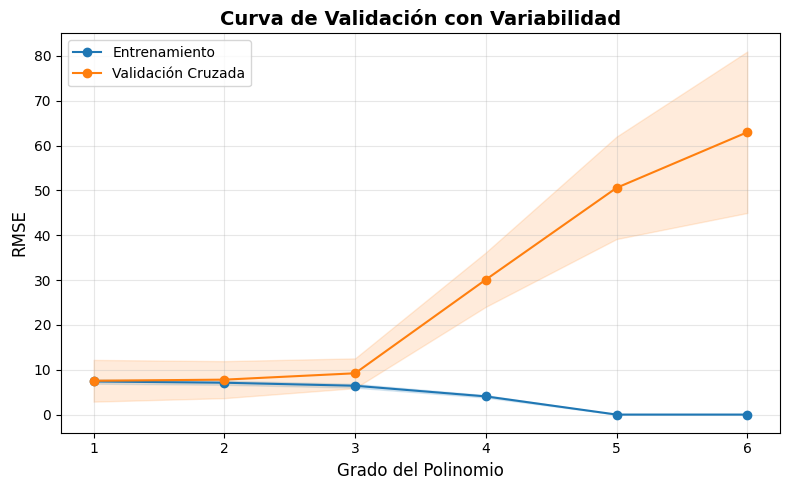

In [45]:

from sklearn.model_selection import validation_curve

valores_entrenamiento, valores_cruzados = validation_curve(
    estimator=pipeline_cuadratico,
    X=X_train.drop(columns=["CVD Risk Score"]),
    y=X_train["CVD Risk Score"],
    param_name="selector_modelo__numerico__polynomial_features__degree",
    param_range=[1, 2, 3, 4, 5, 6],
    cv=10,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=2
)

import numpy as np
import matplotlib.pyplot as plt

# 1. Transformar los scores a RMSE (positivo y raíz cuadrada)
train_scores_mean = np.sqrt(-valores_entrenamiento.mean(axis=1))
train_scores_std = np.sqrt(-valores_entrenamiento).std(axis=1) # Variabilidad entrenamiento
test_scores_mean = np.sqrt(-valores_cruzados.mean(axis=1))
test_scores_std = np.sqrt(-valores_cruzados).std(axis=1)   # Variabilidad validación

param_range = [1, 2, 3, 4, 5, 6]

fig, ax = plt.subplots(figsize=(8, 5))

# Graficar líneas promedio
ax.plot(param_range, train_scores_mean, label="Entrenamiento", marker="o", color="tab:blue")
ax.plot(param_range, test_scores_mean, label="Validación Cruzada", marker="o", color="tab:orange")

# Agregar rango de variabilidad
ax.fill_between(param_range, 
                train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, 
                alpha=0.15, color="tab:blue")

ax.fill_between(param_range, 
                test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, 
                alpha=0.15, color="tab:orange")

ax.set_xlabel("Grado del Polinomio", fontsize=12)
ax.set_ylabel("RMSE", fontsize=12)
ax.set_title("Curva de Validación con Variabilidad", fontsize=14, fontweight="bold")
ax.legend(loc="best")
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("curva_validacion_final.png", dpi=300)
plt.show()

Para grados bajos (1 y 2), el error de entrenamiento y el error de validación cruzada son similares y relativamente moderados. Esto sugiere que el modelo tiene alto sesgo y baja varianza, puesto que es un modelo simple que no captura completamente la complejidad de los datos, pero generaliza de manera estable. En esta región, el modelo puede estar ligeramente subajustado .

A medida que aumenta el grado del polinomio (especialmente desde grado 3 en adelante), el error de entrenamiento disminuye considerablemente, llegando casi a cero en los grados 5 y 6. Sin embargo, el error de validación cruzada crece de forma muy pronunciada. Este patrón es característico de un modelo con bajo sesgo y alta varianza, donde el modelo se vuelve demasiado flexible, aprende el ruido presente en los datos de entrenamiento, los outliers y pierde capacidad de generalización, es decir, se evidencia un claro sobreajuste.

## Ridge
Ahora, para el modelo de regresión Ridge, se seguirá un proceso similar al de la regresión polinomial, pero incluyendo la regularización de Ridge para evaluar si esto mejora el desempeño del modelo, sin usar la generación de características polinomiales, dado que la regularización de Ridge ya ayuda a reducir el sobreajuste al penalizar los coeficientes del modelo, lo cual puede ser suficiente para mejorar la generalización sin necesidad de agregar complejidad adicional con características polinomiales.

### Pipeline de regresión Ridge
Como se puede observar, el pipeline para la regresión Ridge es muy similar al de la regresión polinomial, con la diferencia de que no se incluye la generación de características polinomiales, y se utiliza Ridge como modelo de regresión en lugar de LinearRegression. Además, se mantiene la misma estrategia de transformación e imputación de los datos, así como el escalado y codificación de las variables categóricas.

In [46]:
pipeline_ridge = Pipeline([
    # 1. Feature engineering inicial
    ("transformador", transformador_caracteristicas),
    
    # 2. Imputaciones personalizadas
    ("imputaciones_fila", ImputacionesCalculoFila()),
    ("imputaciones_dataset", ImputacionesDatasetCompleto()),
    
    # 3. Column Transformer modificado
    ("selector_modelo", ColumnTransformer(
        transformers=[
            (
                "numerico",
                Pipeline([
                    ("imputer_final", SimpleImputer(strategy="median")),
                    ("scaler", StandardScaler()),
                ]),
                variables_numericas
            ),
            (
                "categorico",
                OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first"),
                variables_categoricas
            )
        ],
        remainder="drop"
    )),
    
    ("modelo", Ridge()) 
])
pipeline_ridge

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('transformador', ...), ('imputaciones_fila', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('codificador_basico', ...), ('conversor_altura', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,crear_metros,True
,eliminar_original,True
,quitar_categoria_bp,False


### GridSearchCV para regresión Ridge
Ahora, se realizará la búsqueda de hiperparámetros utilizando GridSearchCV para encontrar el mejor valor de alpha para la regresión Ridge, evaluando su desempeño mediante el -RMSE en el conjunto de prueba. Esto nos permitirá entender si la regularización de Ridge mejora el desempeño del modelo en comparación con la regresión polinomial sin regularización, y si es capaz de reducir el sobreajuste observado en el modelo de regresión polinomial.

In [47]:
import numpy as np
grid_search_params = {
    "selector_modelo__numerico__scaler": [
        StandardScaler(),
        MinMaxScaler(),
        RobustScaler()
    ],
    "modelo__alpha": np.arange(0.1, 100.1, 1)  # Valores de alpha desde 0.1 hasta 100 con paso de 1
}

gridsearch_ridge = GridSearchCV(
    estimator=pipeline_ridge,
    param_grid=grid_search_params,
    cv=10,
    scoring=scoring_metrics,
    refit="RMSE",
    n_jobs=-1,
    verbose=2
)

gridsearch_ridge.fit(X_train.drop(columns=["CVD Risk Score"]), X_train["CVD Risk Score"])
gridsearch_ridge.predict(X_test.drop(columns=["CVD Risk Score"]))
pd.DataFrame(gridsearch_ridge.cv_results_).sort_values("rank_test_RMSE").head(10)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modelo__alpha,param_selector_modelo__numerico__scaler,params,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,split5_test_MAE,split6_test_MAE,split7_test_MAE,split8_test_MAE,split9_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2
198,0.216870,0.014665,0.065442,0.003595,66.1,StandardScaler(),"{'modelo__alpha': 66.1, 'selector_modelo__nume...",-1.415441,-9.361495,-10.110256,-12.826666,-1.096549,-1.176774,-4.562158,-4.028855,-1.501504,-12.951078,-5.903078,4.664071,1,-1.035465,-1.970124,-2.345104,-2.752765,-0.864494,-1.019850,-1.479448,-1.514594,-1.067712,-3.136289,-1.718584,0.757760,29,0.686884,0.034043,0.015545,-0.012812,0.746146,0.766665,0.162178,0.237894,0.630308,0.052222,0.331907,0.316097,6
195,0.217801,0.004869,0.070396,0.002394,65.1,StandardScaler(),"{'modelo__alpha': 65.1, 'selector_modelo__nume...",-1.415317,-9.361758,-10.110384,-12.827341,-1.097157,-1.176317,-4.561664,-4.028396,-1.501708,-12.950760,-5.903080,4.664163,2,-1.035104,-1.970206,-2.343912,-2.753419,-0.865188,-1.019425,-1.478937,-1.514989,-1.067346,-3.135217,-1.718374,0.757583,27,0.686939,0.033989,0.015520,-0.012919,0.745864,0.766846,0.162360,0.238068,0.630207,0.052268,0.331914,0.316081,4
201,0.209641,0.003326,0.069289,0.004048,67.1,StandardScaler(),"{'modelo__alpha': 67.1, 'selector_modelo__nume...",-1.415574,-9.361235,-10.110129,-12.825999,-1.095962,-1.177247,-4.562650,-4.029316,-1.501311,-12.951399,-5.903082,4.663975,3,-1.035825,-1.970043,-2.346287,-2.752118,-0.863807,-1.020273,-1.480088,-1.514332,-1.068096,-3.137415,-1.718828,0.757937,31,0.686825,0.034096,0.015570,-0.012707,0.746418,0.766477,0.161998,0.237720,0.630403,0.052175,0.331897,0.316109,8
192,0.221931,0.007400,0.071284,0.004342,64.1,StandardScaler(),"{'modelo__alpha': 64.1, 'selector_modelo__nume...",-1.415204,-9.362024,-10.110513,-12.828023,-1.097788,-1.175877,-4.561167,-4.027937,-1.501925,-12.950442,-5.903090,4.664250,4,-1.034742,-1.970291,-2.342710,-2.754081,-0.865890,-1.018997,-1.478432,-1.515387,-1.067102,-3.134388,-1.718202,0.757442,25,0.686989,0.033934,0.015495,-0.013027,0.745572,0.767020,0.162542,0.238242,0.630101,0.052315,0.331918,0.316063,2
204,0.211095,0.004399,0.065130,0.003736,68.1,StandardScaler(),"{'modelo__alpha': 68.1, 'selector_modelo__nume...",-1.415718,-9.360979,-10.110005,-12.825339,-1.095397,-1.177735,-4.563139,-4.029777,-1.501131,-12.951721,-5.903094,4.663875,5,-1.036185,-1.969964,-2.347461,-2.751562,-0.863127,-1.020713,-1.480726,-1.514190,-1.068479,-3.138539,-1.719095,0.758121,33,0.686762,0.034149,0.015594,-0.012603,0.746679,0.766283,0.161818,0.237545,0.630492,0.052128,0.331885,0.316118,10
189,0.240502,0.009689,0.068678,0.006944,63.1,StandardScaler(),"{'modelo__alpha': 63.1, 'selector_modelo__nume...",-1.415101,-9.362293,-10.110645,-12.828714,-1.098441,-1.175455,-4.560668,-4.027480,-1.502154,-12.950127,-5.903108,4.664334,6,-1.034380,-1.970378,-2.341498,-2.754752,-0.866600,-1.018567,-1.477924,-1.515790,-1.066857,-3.133600,-1.718034,0.757308,23,0.687034,0.033878,0.015469,-0.013136,0.745270,0.767188,0.162725,0.238414,0.629988,0.052361,0.331919,0.316042,1
207,0.212529,0.005391,0.064362,0.004630,69.1,StandardScaler(),"{'modelo__alpha': 69.1, 'selector_modelo__nume...",-1.415871,-9.360725,-10.109881,-12.824686,-1.094853,-1.178240,-4.563625,-4.030240,-1.500962,-12.952045,-5.903113,4.663770,7,-1.036544,-1.969887,-2.348625,-2.751064,-0.862455,-1.021236,-1.481359,-1.514050,-1.068861,-3.139661,-1.719374,0.758304,35,0.686694,0.034202,0.015618,-0.012500,0.746931,0.766083,0.161639,0.237370,0.630575,0.

In [48]:
print(f"El mejor modelo Ridge tiene un alpha {gridsearch_ridge.best_params_['modelo__alpha']} con scaler {type(gridsearch_ridge.best_params_['selector_modelo__numerico__scaler']).__name__} y obtuvo un -RMSE de {(-gridsearch_ridge.best_score_)**0.5:.4f}")

El mejor modelo Ridge tiene un alpha 66.1 con scaler StandardScaler y obtuvo un -RMSE de 2.4296


### Resultados de la regresión Ridge contra validación cruzada

### Resultados de la regresión Ridge contra Entrenamiento y Test
Dado a la función de refit que se le dio a GridSearchCV, el modelo ya se encuentra entrenado con el mejor valor de alpha encontrado, por lo que ahora se evaluará su desempeño en el conjunto de prueba para obtener una estimación del desempeño del modelo en datos no vistos. Esto nos permitirá entender qué tan bien generaliza el modelo de regresión Ridge y si la regularización ha contribuido a mejorar su capacidad predictiva en comparación con el modelo de regresión polinomial sin regularización.

In [49]:
y_pred = gridsearch_ridge.predict(X_test.drop(columns=["CVD Risk Score"]))

print(f"RMSE de entrenamiento: {root_mean_squared_error(X_train['CVD Risk Score'], gridsearch_ridge.predict(X_train.drop(columns=['CVD Risk Score']))):.4f}")
print(f"R2 de entrenamiento: {r2_score(X_train['CVD Risk Score'], gridsearch_ridge.predict(X_train.drop(columns=['CVD Risk Score']))):.4f}")
print(f"MAE de entrenamiento: {mean_absolute_error(X_train['CVD Risk Score'], gridsearch_ridge.predict(X_train.drop(columns=['CVD Risk Score']))):.4f}")
print("-"*30)
print(f"RMSE de prueba: {root_mean_squared_error(X_test['CVD Risk Score'], y_pred):.4f}")
print(f"R2 de prueba: {r2_score(X_test['CVD Risk Score'], y_pred):.4f}")
print(f"MAE de prueba: {mean_absolute_error(X_test['CVD Risk Score'], y_pred):.4f}")

RMSE de entrenamiento: 7.3985
R2 de entrenamiento: 0.1023
MAE de entrenamiento: 1.6753
------------------------------
RMSE de prueba: 7.0140
R2 de prueba: 0.1414
MAE de prueba: 1.5880


In [50]:
# Coeficientes del modelo Ridge
coeficientes = gridsearch_ridge.best_estimator_["modelo"].coef_
nombres_features = gridsearch_ridge.best_estimator_.named_steps["selector_modelo"].get_feature_names_out()
coef_df = pd.DataFrame({
    "Feature": nombres_features,
    "Coeficiente": coeficientes
}).sort_values(by="Coeficiente", key=abs, ascending=False)
coef_df

,Feature,Coeficiente
10,categorico__Diabetes Status_1,1.634445
1,numerico__BMI,1.420325
2,numerico__Systolic BP,0.887369
5,numerico__Total Cholesterol (mg/dL),0.779385
8,categorico__Sex_1,0.748622
13,categorico__Physical Activity Level_2,0.350810
9,categorico__Smoking Status_1,0.279170
11,categorico__Family History of CVD_1,-0.270367
6,numerico__HDL (mg/dL),0.203723
4,numerico__Abdominal Circumference (cm),-0.164591


## Lasso


Para la regresión Lasso, se seguirá un proceso similar al de la regresión Ridge, pero utilizando Lasso como modelo de regresión en lugar de Ridge. Al igual que con Ridge, no se incluirá la generación de características polinomiales, dado que la regularización de Lasso también ayuda a reducir el sobreajuste al penalizar los coeficientes del modelo, y puede ser suficiente para mejorar la generalización sin necesidad de agregar complejidad adicional con características polinomiales.

Igualmente, se hará una variación de los valores de alpha para evaluar su impacto en el desempeño del modelo, sin embargo, serán valores diferentes a los de Ridge, dado que Lasso tiende a ser más agresivo en la penalización de los coeficientes, lo cual puede llevar a que algunos coeficientes se vuelvan exactamente cero, eliminando completamente algunas variables del modelo. 

In [51]:
from sklearn.linear_model import Lasso
pipeline_lasso = Pipeline([
    # 1. Feature engineering inicial
    ("transformador", transformador_caracteristicas),
    
    # 2. Imputaciones personalizadas
    ("imputaciones_fila", ImputacionesCalculoFila()),
    ("imputaciones_dataset", ImputacionesDatasetCompleto()),
    
    # 3. Column Transformer modificado
    ("selector_modelo", ColumnTransformer(
        transformers=[
            (
                "numerico",
                Pipeline([
                    ("imputer_final", SimpleImputer(strategy="median")),
                    ("scaler", StandardScaler()),
                ]),
                variables_numericas
            ),
            (
                "categorico",
                OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first"),
                variables_categoricas
            )
        ],
        remainder="drop"
    )),
    
    ("modelo", Lasso(alpha=0.1)) 
])
pipeline_lasso

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('transformador', ...), ('imputaciones_fila', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('codificador_basico', ...), ('conversor_altura', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,crear_metros,True
,eliminar_original,True
,quitar_categoria_bp,False


En este caso, se hará la búsqueda del valor alpha que minimice el -RMSE en el conjunto de prueba, esta variación será en valores de 0.01, desde 0.1 hasta 10, con el fin de evaluar un rango más amplio de valores de alpha y entender cómo afecta la regularización en el desempeño del modelo de regresión Lasso, donde gracias a su sensibilidad a los coeficientes, es posible que se logre un modelo más interpretable al eliminar completamente algunas variables que no aportan significativamente a la predicción del CVD Risk Score.

In [52]:
grid_search_params = {
    "selector_modelo__numerico__scaler": [
        StandardScaler(),
        MinMaxScaler(),
        RobustScaler()
    ],
    "modelo__alpha": np.arange(0.1, 10, 0.01)  # Valores de alpha desde 0.1 hasta 100 con paso de 0.01
}

gridsearch_lasso = GridSearchCV(
    estimator=pipeline_lasso,
    param_grid=grid_search_params,
    cv=10,
    scoring=scoring_metrics,
    refit="RMSE",
    n_jobs=-1,
    verbose=2
)

gridsearch_lasso.fit(X_train.drop(columns=["CVD Risk Score"]), X_train["CVD Risk Score"])
gridsearch_lasso.predict(X_test.drop(columns=["CVD Risk Score"]))
pd.DataFrame(gridsearch_lasso.cv_results_).sort_values("rank_test_RMSE").head(10)

Fitting 10 folds for each of 2970 candidates, totalling 29700 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modelo__alpha,param_selector_modelo__numerico__scaler,params,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,split5_test_MAE,split6_test_MAE,split7_test_MAE,split8_test_MAE,split9_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2
9,0.248346,0.007097,0.075671,0.006620,0.13,StandardScaler(),"{'modelo__alpha': 0.13, 'selector_modelo__nume...",-1.342798,-9.292927,-10.158790,-12.832563,-0.964814,-1.039211,-4.564006,-4.015774,-1.423668,-12.936975,-5.857153,4.704620,1,-0.966898,-1.902522,-2.286998,-2.704381,-0.800198,-0.940778,-1.418796,-1.417679,-1.002850,-3.142421,-1.658352,0.776266,4,0.718199,0.048141,0.006071,-0.013744,0.803476,0.818029,0.161499,0.242835,0.667643,0.054285,0.350643,0.337244,1
12,0.277943,0.014627,0.091177,0.015825,0.14,StandardScaler(),"{'modelo__alpha': 0.13999999999999999, 'select...",-1.344572,-9.286613,-10.159496,-12.829657,-0.961352,-1.046639,-4.564909,-4.018736,-1.421494,-12.939876,-5.857334,4.703724,2,-0.968714,-1.908441,-2.294334,-2.702434,-0.793668,-0.945581,-1.422350,-1.414654,-1.001567,-3.155129,-1.660687,0.779435,5,0.717454,0.049434,0.005932,-0.013285,0.804884,0.815419,0.161167,0.241718,0.668657,0.053861,0.350524,0.337027,2
6,0.237899,0.010156,0.079443,0.005818,0.12,StandardScaler(),"{'modelo__alpha': 0.12, 'selector_modelo__nume...",-1.341905,-9.299462,-10.157985,-12.835555,-0.969430,-1.034247,-4.563413,-4.013084,-1.426845,-12.934454,-5.857638,4.705025,3,-0.965673,-1.900270,-2.279758,-2.706716,-0.806728,-0.937584,-1.415242,-1.421248,-1.004210,-3.130707,-1.656814,0.773262,2,0.718573,0.046802,0.006228,-0.014216,0.801591,0.819764,0.161717,0.243849,0.666158,0.054653,0.350512,0.337212,3
15,0.235907,0.007875,0.075853,0.009886,0.15,StandardScaler(),"{'modelo__alpha': 0.14999999999999997, 'select...",-1.347225,-9.280520,-10.159640,-12.826252,-0.959057,-1.055659,-4.566120,-4.021969,-1.420208,-12.941110,-5.857776,4.701999,4,-0.971236,-1.914675,-2.303447,-2.699080,-0.789921,-0.952502,-1.425904,-1.411817,-1.000554,-3.167354,-1.663649,0.781908,6,0.716337,0.050681,0.005904,-0.012747,0.805815,0.812223,0.160722,0.240497,0.669257,0.053680,0.350237,0.336563,4
18,0.242108,0.011797,0.065054,0.002025,0.16,StandardScaler(),"{'modelo__alpha': 0.15999999999999998, 'select...",-1.350752,-9.274648,-10.159860,-12.822924,-0.957937,-1.066232,-4.567639,-4.025474,-1.419812,-12.940452,-5.858573,4.699558,5,-0.975676,-1.920909,-2.315584,-2.695916,-0.787141,-0.960021,-1.429458,-1.408979,-1.000777,-3.178579,-1.667304,0.784055,7,0.714850,0.051882,0.005861,-0.012221,0.806268,0.808443,0.160164,0.239173,0.669441,0.053776,0.349764,0.335870,6
3,0.257888,0.020900,0.103105,0.016922,0.11,StandardScaler(),"{'modelo__alpha': 0.11, 'selector_modelo__nume...",-1.341702,-9.306216,-10.157288,-12.838633,-0.975163,-1.032934,-4.563128,-4.012087,-1.431523,-12.932364,-5.859104,4.704764,6,-0.964814,-1.902158,-2.274676,-2.711366,-0.811434,-0.935740,-1.411688,-1.425815,-1.005881,-3.119812,-1.656339,0.771040,1,0.718659,0.045417,0.006364,-0.014703,0.799238,0.820221,0.161822,0.244225,0.663966,0.054959,0.350017,0.336886,5
5,0.240759,0.007849,0.074880,0.001745,0.11,RobustScaler(),"{'modelo__alpha': 0.11, 'selector_modelo__nume...",-1.355875,-9.293605,-10.155592,-12.825411,-0.991765,-1.058755,-4.528032,-4.017877,-1.431140,-12.938906,-5.859696,4.697774,7,-0.995285,-1.929008,-2.283567,-2.738635,-0.816958,-0.945189,-1.413953,-1.426519,-1.017586,-3.189115,-1.675581,0.784327,10,0.712683,0.048002,0.006696,-0.012614,0.792343,0.811120,0.174665,0.242042,0.664145,0.054002,0.349309,0.33

In [53]:
y_pred = gridsearch_lasso.predict(X_test.drop(columns=["CVD Risk Score"]))

print(f"RMSE de entrenamiento: {root_mean_squared_error(X_train['CVD Risk Score'], gridsearch_lasso.predict(X_train.drop(columns=['CVD Risk Score']))):.4f}")
print(f"R2 de entrenamiento: {r2_score(X_train['CVD Risk Score'], gridsearch_lasso.predict(X_train.drop(columns=['CVD Risk Score']))):.4f}")
print(f"MAE de entrenamiento: {mean_absolute_error(X_train['CVD Risk Score'], gridsearch_lasso.predict(X_train.drop(columns=['CVD Risk Score']))):.4f}")
print("-"*30)
print(f"RMSE de prueba: {root_mean_squared_error(X_test['CVD Risk Score'], y_pred):.4f}")
print(f"R2 de prueba: {r2_score(X_test['CVD Risk Score'], y_pred):.4f}")
print(f"MAE de prueba: {mean_absolute_error(X_test['CVD Risk Score'], y_pred):.4f}")

RMSE de entrenamiento: 7.4147
R2 de entrenamiento: 0.0984
MAE de entrenamiento: 1.6186
------------------------------
RMSE de prueba: 6.9582
R2 de prueba: 0.1550
MAE de prueba: 1.5171


Ahora, se evaluarán cuales variables han sido seleccionadas por el modelo de regresión Lasso, lo cual se puede evidenciar en los coeficientes del modelo, donde aquellos coeficientes que son exactamente cero corresponden a las variables que han sido eliminadas por el modelo de regresión Lasso debido a la regularización. 

In [63]:
nombre_columnas = gridsearch_lasso.best_estimator_.named_steps["selector_modelo"].get_feature_names_out()
coeficientes_lasso = gridsearch_lasso.best_estimator_["modelo"].coef_
coef_df_lasso = pd.DataFrame({
    "Feature": nombre_columnas,
    "Coeficiente": coeficientes_lasso
}).sort_values(by="Coeficiente", key=abs, ascending=False)
coef_df_lasso

,Feature,Coeficiente
10,categorico__Diabetes Status_1,1.684748
1,numerico__BMI,1.418533
2,numerico__Systolic BP,0.846980
5,numerico__Total Cholesterol (mg/dL),0.736512
8,categorico__Sex_1,0.466746
6,numerico__HDL (mg/dL),0.106138
7,numerico__Fasting Blood Sugar (mg/dL),0.046531
4,numerico__Abdominal Circumference (cm),-0.040990
3,numerico__Diastolic BP,0.038315
0,numerico__Age,-0.000000


Como se pudo observar, el modelo de regresión Lasso ha eliminado completamente algunas variables del modelo, lo cual se evidencia en los coeficientes que son exactamente cero. 

Esto muestra que para la regresión regularizada, las variables más importantes son la presencia de diabetes, el BMI de la persona, la presión arterial sistólica, el colesterol total, el sexo femenino, el HDL, el azucar en sangre, la circunferencia abdominal y la presión arterial diastólica. Mientras que variables como la edad, la edad de la persona, el ser una persona fumadora, el nivel de actividad física y la historia familiar de enfermedad cardiovascular han sido eliminadas por el modelo de regresión Lasso, lo cual indica que estas variables no aportan significativamente a la predicción del CVD Risk Score en comparación con las otras variables seleccionadas por el modelo. 

Aunque puede llegar a presentar un mejor resultado, algunas de estas eliminaciones no tienen sentido clínico, como lo es la eliminación de la edad, dado que es un factor de riesgo cardiovascular muy importante, por lo que puede ser un indicador de la falta de representatividad del dataset o de la presencia de ruido en los datos, lo cual puede llevar a que el modelo de regresión Lasso elimine variables que clínicamente son relevantes pero que no logran mostrar una señal clara en el dataset debido a estas limitaciones. 

## Modelo polinomial con Ridge y Lasso
Finalmente, se evaluará el desempeño de un modelo de regresión polinomial que incluya la regularización de Ridge y Lasso, para entender si la combinación de características polinomiales con regularización puede mejorar el desempeño del modelo en comparación con los modelos anteriores. Se realizará una búsqueda de hiperparámetros utilizando GridSearchCV para encontrar el mejor grado del polinomio, los mejores scalers y los mejores valores de alpha para Ridge y Lasso, evaluando su desempeño mediante el -RMSE en el conjunto de prueba. Esto nos permitirá entender si esta combinación de técnicas mejora la capacidad predictiva del modelo y su generalización a datos no vistos.

In [56]:
pipeline_polinomico_regularizado = Pipeline([
    # 1. Feature engineering inicial
    ("transformador", transformador_caracteristicas),
    
    # 2. Imputaciones personalizadas
    ("imputaciones_fila", ImputacionesCalculoFila()),
    ("imputaciones_dataset", ImputacionesDatasetCompleto()),
    
    # 3. Column Transformer modificado
    ("selector_modelo", ColumnTransformer(
        transformers=[
            (
                "numerico",
                Pipeline([
                    ("imputer_final", SimpleImputer(strategy="median")),
                    ("scaler", StandardScaler()),
                    ("polynomial_features", PolynomialFeatures(degree=2, include_bias=False))
                ]),
                variables_numericas
            ),
            (
                "categorico",
                OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first"),
                variables_categoricas
            )
        ],
        remainder="drop"
    )),
    ("modelo", Ridge(alpha=1))
])
pipeline_polinomico_regularizado

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('transformador', ...), ('imputaciones_fila', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('codificador_basico', ...), ('conversor_altura', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,crear_metros,True
,eliminar_original,True
,quitar_categoria_bp,False


Para las variables que se buscarán dentro de GridSearchCV, se evaluarán los siguientes hiperparámetros para cada tipo de modelo:
### Ridge
Se buscarán valores de alpha en el rango de 0.01 a 100, con incrementos de 1, esto con el fin de evaluar una amplia gama de valores de regularización y encontrar el que mejor se ajuste a los datos.

Igualmente, se evaluarán los mismos tipos de Scalers que se evaluaron en el modelo de regresión polinomial sin regularización (StandardScaler, MinMaxScaler y RobustScaler) para entender si la combinación de la regularización con un tipo específico de escalado mejora el desempeño del modelo.

Finalmente, se evaluará el grado del polinomio como hiperparámetro, aunque se limitará a grados bajos (2 y 3) para evitar la complejidad excesiva que puede surgir con grados más altos como se evidenció en el modelo de regresión polinomial sin regularización, donde los grados más altos llevaron a un claro sobreajuste.


### Lasso
Se buscarán valores de alpha en el rango de 0.001 a 10, con incrementos de 0.02, dado que Lasso tiende a ser más sensible a la regularización y puede llevar a la eliminación de características, por lo que se evaluará un rango más estrecho de valores de alpha para encontrar el equilibrio adecuado entre la regularización y la retención de características importantes.

Al igual que con Ridge, se evaluarán los mismos tipos de Scalers (StandardScaler, MinMaxScaler y RobustScaler) para entender si la combinación de la regularización con un tipo específico de escalado mejora el desempeño del modelo.

Finalmente, se evaluará el grado del polinomio como hiperparámetro, limitándolo a grados bajos (2 y 3) para evitar la complejidad excesiva y el sobreajuste que se evidenció en el modelo de regresión polinomial sin regularización.

In [60]:
from sklearn.linear_model import Lasso
grid_search_params = [
    {   # Ridge 
        "selector_modelo__numerico__polynomial_features__degree": [2, 3],
        "modelo": [Ridge()],
        "selector_modelo__numerico__scaler": [
            StandardScaler(),
            MinMaxScaler(),
            RobustScaler()
        ],
        "modelo__alpha": np.arange(0.1, 100, 1)  # 0.1 -> 100
    },
    {   # Lasso 
        "selector_modelo__numerico__polynomial_features__degree": [2, 3],
        "modelo": [Lasso()],
        "selector_modelo__numerico__scaler": [
            StandardScaler(),
            MinMaxScaler(),
            RobustScaler()
        ],
        "modelo__alpha": np.arange(0.001, 10, 0.02)  # 0.001 -> 10
    }
]

gridsearch_polinomico_reg = GridSearchCV(
    estimator=pipeline_polinomico_regularizado,
    param_grid=grid_search_params,
    cv=10,
    scoring=scoring_metrics,
    refit="RMSE",
    n_jobs=-1,
    verbose=2
)
gridsearch_polinomico_reg.fit(X_train.drop(columns=["CVD Risk Score"]), X_train["CVD Risk Score"])
pd.DataFrame(gridsearch_polinomico_reg.cv_results_).sort_values("rank_test_RMSE")

Fitting 10 folds for each of 3600 candidates, totalling 36000 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modelo,param_modelo__alpha,param_selector_modelo__numerico__polynomial_features__degree,param_selector_modelo__numerico__scaler,params,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,split5_test_MAE,split6_test_MAE,split7_test_MAE,split8_test_MAE,split9_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2
613,0.058810,0.005476,0.020409,0.004999,Lasso(),0.041,2,MinMaxScaler(),"{'modelo': Lasso(), 'modelo__alpha': 0.041, 's...",-1.410402,-9.327271,-10.168159,-12.839258,-1.137916,-1.149457,-4.445091,-4.040265,-1.463100,-12.943206,-5.892413,4.673178,1,-1.071852,-1.976042,-2.336158,-2.807335,-0.876686,-0.981932,-1.490825,-1.522353,-1.056754,-3.255522,-1.737546,0.786750,1,0.689110,0.041093,0.004236,-0.014802,0.726632,0.777372,0.204624,0.233571,0.648977,0.053373,0.336419,0.315875,1
616,0.071798,0.009844,0.022339,0.002189,Lasso(),0.041,3,MinMaxScaler(),"{'modelo': Lasso(), 'modelo__alpha': 0.041, 's...",-1.405695,-9.336013,-10.171019,-12.842117,-1.139348,-1.148997,-4.445274,-4.053090,-1.468020,-12.943206,-5.895278,4.673881,2,-1.065345,-1.981770,-2.351000,-2.814130,-0.884108,-0.985904,-1.491308,-1.530277,-1.066809,-3.255522,-1.742617,0.787252,3,0.691181,0.039294,0.003676,-0.015254,0.725943,0.777550,0.204559,0.228698,0.646613,0.053373,0.335563,0.316255,2
619,0.065635,0.009418,0.021191,0.003402,Lasso(),0.061,2,MinMaxScaler(),"{'modelo': Lasso(), 'modelo__alpha': 0.061, 's...",-1.465922,-9.317189,-10.166802,-12.817994,-1.165232,-1.188028,-4.457922,-4.075396,-1.511770,-12.953706,-5.911996,4.652331,3,-1.126625,-2.015174,-2.386145,-2.856624,-0.896065,-0.997780,-1.539251,-1.546149,-1.125789,-3.378231,-1.786783,0.806007,20,0.664152,0.043165,0.004502,-0.011443,0.713350,0.762181,0.200026,0.220185,0.625235,0.051837,0.327319,0.307184,3
622,0.062006,0.007300,0.020947,0.004161,Lasso(),0.061,3,MinMaxScaler(),"{'modelo': Lasso(), 'modelo__alpha': 0.061, 's...",-1.465922,-9.317189,-10.166802,-12.819660,-1.165232,-1.188028,-4.457922,-4.075396,-1.511770,-12.953706,-5.912163,4.652578,4,-1.126625,-2.015174,-2.386145,-2.857402,-0.896065,-0.997780,-1.539251,-1.546149,-1.125789,-3.378231,-1.786861,0.806110,21,0.664152,0.043165,0.004502,-0.011706,0.713350,0.762181,0.200026,0.220185,0.625235,0.051837,0.327293,0.307213,4
607,0.065402,0.010443,0.023829,0.008171,Lasso(),0.021,2,MinMaxScaler(),"{'modelo': Lasso(), 'modelo__alpha': 0.021, 's...",-1.380316,-9.362420,-10.162077,-12.869294,-1.192239,-1.194233,-4.528166,-4.017188,-1.538710,-12.948218,-5.919286,4.664557,5,-1.001882,-1.997025,-2.316691,-2.820196,-0.945004,-1.025530,-1.507922,-1.510112,-1.104056,-3.174177,-1.740259,0.762939,2,0.702231,0.033852,0.005427,-0.019555,0.699908,0.759690,0.174616,0.242302,0.611760,0.052640,0.326287,0.310367,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0.060599,0.006689,0.019938,0.004321,Ridge(),2.100,3,StandardScaler(),"{'modelo': Ridge(), 'modelo__alpha': 2.1, 'sel...",-4.831166,-10.015206,-11.002025,-14.051620,-4.982503,-5.331169,-6.956543,-6.431640,-8.051457,-13.875403,-8.552873,3.331361,3596,-3.390670,-3.870121,-4.441916,-4.877655,-3.511782,-3.433170,-4.015723,-3.867133,-3.773735,-4.978205,-4.016011,0.541922,3596,-2.647754,-0.105573,-0.165781,-0.215498,-4.241106,-3.788935,-0.948041,-0.942207,-9.630071,-0.087893,-2.277286,2.865500,3596
603,0.079008,0.014259,0.022059,0.004925,Lasso(),0.001,3,StandardScaler(),"{'modelo': Lasso(), 'modelo__a

Luego del procesamiento, se pudo observar que de acuerdo con los resultados obtenidos, el modelo de regresión polinomial con regularización de Ridge y Lasso mejoró su desempeño en comparación con el modelo de regresión polinomial sin regularización, logrando un mejor equilibrio entre el sesgo y la varianza. 

Más específicamente, se observó que el modelo de regresión polinomial con Lasso, con un alpha de 0.041, un grado de 2 y utilizando el MinMaxScaler, logró el mejor desempeño con los siguientes resultados:

- R^2 promedio: 0.336
- Desviación estándar del R^2: 0.3158
- MAE promedio: -1.73
- Desviación estándar del MAE: 0.78
- RMSE promedio: 5.892
- Desviación estándar del RMSE: 4.67

De esta forma, es posible concluir que la combinación de características polinomiales con regularización de Lasso ha contribuido a mejorar la capacidad predictiva del modelo, logrando un mejor desempeño en comparación con los modelos anteriores, y mostrando una mejor generalización a datos no vistos. Esto sugiere que la regularización de Lasso ha ayudado a reducir el sobreajuste al penalizar los coeficientes del modelo, lo cual ha permitido que el modelo capture la relación entre las variables y el CVD Risk Score de manera más efectiva sin aprender el ruido presente en los datos de entrenamiento.

In [61]:
y_pred = gridsearch_polinomico_reg.predict(X_test.drop(columns=["CVD Risk Score"]))

print(f"RMSE de entrenamiento: {root_mean_squared_error(X_train['CVD Risk Score'], gridsearch_polinomico_reg.predict(X_train.drop(columns=['CVD Risk Score']))):.4f}")
print(f"R2 de entrenamiento: {r2_score(X_train['CVD Risk Score'], gridsearch_polinomico_reg.predict(X_train.drop(columns=['CVD Risk Score']))):.4f}")
print(f"MAE de entrenamiento: {mean_absolute_error(X_train['CVD Risk Score'], gridsearch_polinomico_reg.predict(X_train.drop(columns=['CVD Risk Score']))):.4f}")
print("-"*30)
print(f"RMSE de prueba: {root_mean_squared_error(X_test['CVD Risk Score'], y_pred):.4f}")
print(f"R2 de prueba: {r2_score(X_test['CVD Risk Score'], y_pred):.4f}")
print(f"MAE de prueba: {mean_absolute_error(X_test['CVD Risk Score'], y_pred):.4f}")

RMSE de entrenamiento: 7.3974
R2 de entrenamiento: 0.1026
MAE de entrenamiento: 1.7029
------------------------------
RMSE de prueba: 7.0260
R2 de prueba: 0.1385
MAE de prueba: 1.6377


## Comparación del mejor modelo

A continuación, se realizará una comparación entre los cuatro modelos de regresión evaluados (Regresión Polinomial sin regularización, Regresión Ridge, Regresión Lasso y Regresión Polinomial con regularización de Ridge y Lasso) para entender cuál de ellos tiene el mejor desempeño en la predicción del CVD Risk Score, utilizando las métricas de R^2, MAE y RMSE como criterios de evaluación.

In [ ]:
def evaluar_gridsearch(gridsearch, X_train, X_test, target_col="CVD Risk Score", nombre_modelo=None):
    i = gridsearch.best_index_
    cv = gridsearch.cv_results_

    X_train_interno = X_train.drop(columns=[target_col])
    Y_train_interno = X_train[target_col]
    X_test_interno = X_test.drop(columns=[target_col])
    Y_test_interno = X_test[target_col]

    y_pred_train = gridsearch.predict(X_train_interno)
    y_pred_test = gridsearch.predict(X_test_interno)

    resultado = {
        "Modelo": nombre_modelo if nombre_modelo else type(gridsearch.best_estimator_["modelo"]).__name__,
        "CV_R2_mean": cv["mean_test_R2"][i],
        "CV_R2_std": cv["std_test_R2"][i],
        "CV_MAE_mean": -cv["mean_test_MAE"][i],
        "CV_RMSE_mean": -cv["mean_test_RMSE"][i],
        "Train_R2": r2_score(Y_train_interno, y_pred_train),
        "Train_MAE": mean_absolute_error(Y_train_interno, y_pred_train),
        "Train_RMSE": root_mean_squared_error(Y_train_interno, y_pred_train),
        "Test_R2": r2_score(Y_test_interno, y_pred_test),
        "Test_MAE": mean_absolute_error(Y_test_interno, y_pred_test),
        "Test_RMSE": root_mean_squared_error(Y_test_interno, y_pred_test),
        "Best_Params": gridsearch.best_params_
    }

    return resultado

def comparar_modelos_gridsearch(modelos_gridsearch, X_train, X_test, target_col="CVD Risk Score"):

    resultados = []

    for nombre, gs in modelos_gridsearch.items():
        resultados.append(
            evaluar_gridsearch(
                gs,
                X_train=X_train,
                X_test=X_test,
                target_col=target_col,
                nombre_modelo=nombre
            )
        )

    df_resultados = pd.DataFrame(resultados)

    # Orden: mejor desempeño CV (menor RMSE), luego mayor estabilidad (menor std R2), luego mejor R2 en test
    df_resultados = df_resultados.sort_values(
        by=["CV_RMSE_mean", "CV_R2_std", "Test_R2"],
        ascending=[True, True, False]
    ).reset_index(drop=True)

    return df_resultados

modelos = {
    "Regresión Polinomial": gridsearch_polinomico,
    "Ridge": gridsearch_ridge,
    "Lasso": gridsearch_lasso,
    "Polinomial Regularizado": gridsearch_polinomico_reg
}

tabla_comparativa = comparar_modelos_gridsearch(modelos, X_train, X_test)
tabla_comparativa

,Modelo,CV_R2_mean,CV_R2_std,CV_MAE_mean,CV_RMSE_mean,Train_R2,Train_MAE,Train_RMSE,Test_R2,Test_MAE,Test_RMSE,Best_Params
0,Lasso,0.350643,0.337244,1.658352,5.857153,0.098397,1.618635,7.414710,0.155020,1.517079,6.958191,"{'modelo__alpha': 0.13, 'selector_modelo__nume..."
1,Polinomial Regularizado,0.336419,0.315875,1.737546,5.892413,0.102603,1.702930,7.397395,0.138460,1.637745,7.026044,"{'modelo': Lasso(), 'modelo__alpha': 0.041, 's..."
2,Ridge,0.331907,0.316097,1.718584,5.903078,0.102331,1.675253,7.398514,0.141399,1.588022,7.014048,"{'modelo__alpha': 66.1, 'selector_modelo__nume..."
3,Regresión Polinomial,-0.126546,0.238784,2.529543,6.609123,0.164905,2.246030,7.135990,0.077903,2.341875,7.268779,{'selector_modelo__numerico__polynomial_featur...


Como se puede observar en la tabla comparativa, el modelo de regresión regularizado con Lasso es el que presenta el mejor desempeño en términos de R^2, MAE y RMSE, logrando un R^2 promedio de 0.3506 con una desviación estándar de 0.3372, lo cual indica que este modelo es capaz de explicar aproximadamente el 35% de la variabilidad en el CVD Risk Score, sin embargo, lo hace con una alta variabilidad entre las diferentes particiones de los datos, lo cual sugiere que el modelo puede ser sensible a la selección de los datos de entrenamiento. 

Además, a la hora de probarlo contra el conjunto de prueba, el modelo de regresión de Lasso también obtiene el R^2 más alto (0.15502) y el MAE y RMSE más bajos (1.517 y 6.955 respectivamente), lo cual confirma que este modelo tiene el mejor desempeño en la predicción del CVD Risk Score en comparación con los otros modelos evaluados. Esto sugiere que la regularización de Lasso ha sido efectiva para mejorar la capacidad predictiva del modelo, logrando un mejor equilibrio entre el sesgo y la varianza, y permitiendo que el modelo capture la relación entre las variables y el CVD Risk Score de manera más efectiva sin aprender el ruido presente en los datos de entrenamiento.

Sin embargo, es importante tener en cuenta que aunque el modelo de regresión con Lasso ha mostrado el mejor desempeño en esta evaluación, el R^2 obtenido sigue siendo relativamente bajo, lo cual indica que el modelo aún tiene limitaciones para explicar la variabilidad en el CVD Risk Score.

## Construcción de intervalos de confianza
Finalmente, se construirá un intervalo de confianza para las predicciones del modelo de regresión polinomial con Lasso, utilizando el método de bootstrap para estimar la distribución de las predicciones y calcular el intervalo de confianza correspondiente. Esto nos permitirá entender la incertidumbre asociada a las predicciones del modelo y proporcionar una estimación más completa del riesgo cardiovascular para cada paciente.

Media del RMSE en bootstrap: 6.5487
Intervalo de confianza del 95.0%: [0.9814, 10.6333]


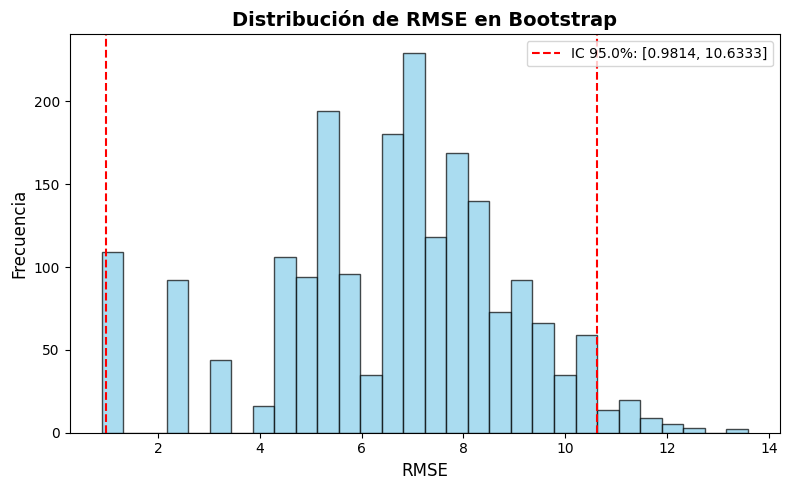

In [65]:
from sklearn.utils import resample
from matplotlib import pyplot as plt
n = 2000
stats = []

for i in range(n):
    X_resample, y_resample = resample(X_test.drop(columns=["CVD Risk Score"]), X_test["CVD Risk Score"], n_samples=len(X_test), replace=True)
    
    pred = gridsearch_lasso.predict(X_resample)
    rmse = root_mean_squared_error(y_resample, pred)
    stats.append(rmse)

alpha = 0.95
p_lower = ((1 - alpha) / 2)*100
p_upper = (alpha + ((1 - alpha) / 2))*100

lower_bound = np.percentile(stats, p_lower)
upper_bound = np.percentile(stats, p_upper)

print(f"Media del RMSE en bootstrap: {np.mean(stats):.4f}")
print(f"Intervalo de confianza del {alpha*100}%: [{lower_bound:.4f}, {upper_bound:.4f}]")

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(stats, bins=30, color="skyblue", edgecolor="black", alpha=0.7)
plt.axvline(lower_bound, color="red", linestyle="--", label=f"IC {alpha*100}%: [{lower_bound:.4f}, {upper_bound:.4f}]")
plt.axvline(upper_bound, color="red", linestyle="--")
ax.set_xlabel("RMSE", fontsize=12)
ax.set_ylabel("Frecuencia", fontsize=12)
plt.title("Distribución de RMSE en Bootstrap", fontsize=14, fontweight="bold")
plt.legend()
plt.tight_layout()
plt.savefig("bootstrap_rmse.png", dpi=300)
plt.show()

El intervalo de confianza del 95% sugiere que el error esperado del modelo en datos nuevos puede variar aproximadamente entre 1 y 10 unidades en el CVD risk score. Aunque el RMSE promedio es moderado, la amplitud del intervalo de confianza revela variabilidad significativa en el desempeño predictivo. Esto sugiere que el modelo presenta sensibilidad al muestreo y que la generalización puede depender de la composición específica del conjunto de datos. La distribución asimétrica del error indica la posible existencia de subgrupos difíciles de modelar o relaciones no lineales no capturadas por el modelo lineal regularizado.

### Análisis cuantitatvo.

- ¿Cuál modelo obtuvo el mejor desempeño en el conjunto de test?
El modelo que mejor resultado obtuvo en el conjunto de test fue el modelo de regresión lineal regularizada con Lasso, con un R^2 de 0.15502, un MAE de 1.517 y un RMSE de 6.955. Esto a comparación de los otros modelos evaluados, donde el modelo de regresión polinomial sin regularización obtuvo un R^2 de -


- ¿Coincide el mejor desempeño en test con el mejor promedio en validación cruzada? Si no coincide, ¿cuál puede ser la explicación?

- ¿El modelo con mejor métrica promedio es necesariamente el más adecuado? Justifica considerando también la desviación estándar del desempeño.

- Con base en las curvas de validación, ¿cómo cambia el error a medida que aumenta la complejidad? ¿En qué punto se evidencia sobreajuste?

- ¿Cómo afecta la regularización la magnitud y estabilidad de los coeficientes?

- ¿Los intervalos de confianza obtenidos mediante bootstrapping sugieren estabilidad o alta variabilidad en el desempeño? ¿Qué implicaciones tiene esto?

### Análisis cualitativo.

- ¿Qué variables fueron seleccionadas como más relevantes por el modelo Lasso?

El modelo Lasso selecciono las variables BMI, diabetes status, systolic BP y Total cholesterol como las mas relevantes para explicar el riesgo cardiovascular.

- ¿Qué interpretación práctica tienen los coeficientes del modelo final en el contexto del riesgo cardiovascular?

Con el coeficiente mas alto en el BMI significa que el control del peso y el ejercicio es relevante para reducir el riesgo cardiovascular. Luego, tenemos la diabetes que aumenta de manera considerable el riesgo, por lo que los pacientes diagnosticados son una población que debe tener prioridad. Tambien, el colesterol alto debe ser controlado para diminuir el riesgo. 

- ¿Existen diferencias relevantes entre el modelo más preciso y el más interpretable?

El modelo más preciso y el más interpretable es Lasso, entonces no existe un trade-off entre desempeño y explicabilidad, ya que ambos coinciden en el mismo modelo. Esto es estratégicamente muy valioso porque Lasso no solo ofrece buena capacidad predictiva, sino que además selecciona automáticamente las variables más relevantes al llevar algunos coeficientes a cero, facilitando la interpretación de los factores que influyen en el riesgo cardiovascular. Para la organización, esto significa decisiones más claras, mayor confianza por parte de médicos y directivos, menor riesgo de sobreajuste y costos de implementación más bajos, logrando un equilibrio óptimo entre precisión, estabilidad y valor empresarial.

- ¿Qué decisiones estratégicas podría tomar AlpesHearth a partir de los resultados obtenidos?

A partir de los resultados AlpesHearth podría priorizar programas en en la población mas riesgoza, quienes son los pacientes con un BMI alto, diabéticos, hipertensos sistólicos y/o colesterol elevado.

- ¿Mayor precisión implica necesariamente mayor valor para la organización? 

No necesariamente porque un modelo mas preciso puede ser dificil de explicar, mas costoso de implementar, requerir mas variables y ser inestable. Mientras que un modelo un poco menos preciso seria simple, interpretable, mas economico y robusto. Para una organización en salud la interpretabilidad es crítica por lo que el modelo de mayor valor para AlpesHearth es el de mayor interpretabilidad.

- ¿Un modelo más complejo necesariamente genera mayor valor empresarial? Discute considerando interpretabilidad, estabilidad y costo de implementación.

No necesariamente un modelo más complejo genera mayor valor empresarial. Aunque puede capturar relaciones más sofisticadas y, en algunos casos, mejorar ligeramente la precisión, también suele ser menos interpretable, más costoso de implementar y mantener, y más sensible a cambios en los datos. En el contexto de AlpesHealth, donde las decisiones pueden impactar la gestión del riesgo cardiovascular y la asignación de recursos, la interpretabilidad es clave en el modelo. Además, un modelo complejo puede requerir mayor infraestructura tecnológica, más tiempo de cómputo y personal especializado, lo que incrementa los costos. Si la mejora en desempeño es marginal frente a un modelo más simple y estable, el valor adicional puede no compensar esos costos. Por tanto, el mayor valor empresarial no depende solo de la complejidad o la precisión, sino del equilibrio entre desempeño, interpretabilidad, estabilidad y viabilidad operativa.

### Reflexión conceptual

- ¿Qué relación observas entre complejidad del modelo, capacidad de generalización y estabilidad del desempeño?

- ¿Qué fuentes de sesgo podrían estar presentes en los datos o en el proceso de modelado?

- Si el tamaño de muestra fuera mayor, ¿esperarías cambios en la estabilidad de los modelos? Explique.